In [ ]:
!pip install tensorflow-addons==0.8.3
!pip install tensorflow==2.2.0-rc3


from tensorflow_addons import losses
import tensorflow as tf
from tensorflow import keras

     |████████████████████████████████| 1.0 MB 13.2 MB/s 
     |████████████████████████████████| 516.2 MB 12 kB/s 
     |████████████████████████████████| 2.9 MB 51.6 MB/s 
     |████████████████████████████████| 454 kB 63.9 MB/s 
     |████████████████████████████████| 3.0 MB 12.6 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
  Attempting uninstall: tensorflow
    Fou

In [ ]:
print("Sriram Thope")

Sriram Thope


In [ ]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score
from sklearn.neural_network import MLPClassifier

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/cascade-cup-22/train.csv')

In [ ]:
dft = pd.read_csv('/content/drive/MyDrive/cascade-cup-22/test.csv')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Cascade_cup/train.csv')
dft = pd.read_csv('/content/drive/MyDrive/Cascade_cup/test.csv')

Processing

In [ ]:
df4 = df.copy()

In [ ]:
dftest = dft.copy()

In [ ]:
df4['order_time'] = pd.to_datetime(df4['order_time'])
df4['order_date'] = pd.to_datetime(df4['order_date'])
df4['allot_time'] = pd.to_datetime(df4['allot_time'])
df4['accept_time'] = pd.to_datetime(df4['accept_time'])
df4['pickup_time'] = pd.to_datetime(df4['pickup_time'])
df4['delivered_time'] = pd.to_datetime(df4['delivered_time'])
df4['cancelled_time'] = pd.to_datetime(df4['cancelled_time'])
df4['Day'] = df4['order_date'].dt.day_name()

df4['accept_time_with_outliers'] = df4['accept_time'].fillna(pd.to_datetime('2022-02-02 20:50:50'))

df4['alloted_orders'] = df4['alloted_orders'].fillna(0)
df4['delivered_orders'] = df4['delivered_orders'].fillna(0)
df4['undelivered_orders'] = df4['undelivered_orders'].fillna(0)
df4['session_time'] = df4['session_time'].fillna(0)
df4['lifetime_order_count'] = df4['lifetime_order_count'].fillna(0)
df4['reassigned_order'] = df4['reassigned_order'].fillna(0)
df4['accept_time'] = df4['accept_time'].fillna(0)
df4['pickup_time'] = df4['pickup_time'].fillna(0)
df4['delivered_time'] = df4['delivered_time'].fillna(0)
df4['cancelled_time'] = df4['cancelled_time'].fillna(0)

df4['accepted'] = df4['accept_time']
df4['accepted'] = np.where(df4['accepted'] != 0, 1, df4['accepted'])
df4['pickedup'] = df4['pickup_time']
df4['pickedup'] = np.where(df4['pickedup'] != 0, 1, df4['pickedup'])
df4['delivered'] = df4['delivered_time']
df4['delivered'] = np.where(df4['delivered'] != 0, 1, df4['delivered'])

df4['O-A_time'] = df4['allot_time'] - df4['order_time']
df4['A-A_time'] = df4['accept_time_with_outliers'] - df4['allot_time']

df4['A-A_s'] = df4['A-A_time'] / pd.to_timedelta(1, unit='S')
df4['O-A_s'] = df4['O-A_time'] / pd.to_timedelta(1, unit='S')

df4['undelivered_percentage'] = df4['undelivered_orders']/(df4['alloted_orders'] + 1)
df4['timeofday'] = df4['allot_time'].dt.hour + df4['allot_time'].dt.minute/60 + df4['allot_time'].dt.second/3600

In [ ]:
dftest['order_time'] = pd.to_datetime(dftest['order_time'])
dftest['order_date'] = pd.to_datetime(dftest['order_date'])
dftest['allot_time'] = pd.to_datetime(dftest['allot_time'])
dftest['accept_time'] = pd.to_datetime(dftest['accept_time'])
dftest['Day'] = dftest['order_date'].dt.day_name()

dftest['accept_time_with_outliers'] = dftest['accept_time'].fillna(pd.to_datetime('2022-02-02 20:50:50'))

dftest['alloted_orders'] = dftest['alloted_orders'].fillna(0)
dftest['delivered_orders'] = dftest['delivered_orders'].fillna(0)
dftest['undelivered_orders'] = dftest['undelivered_orders'].fillna(0)
dftest['session_time'] = dftest['session_time'].fillna(0)
dftest['lifetime_order_count'] = dftest['lifetime_order_count'].fillna(0)
dftest['reassigned_order'] = dftest['reassigned_order'].fillna(0)
dftest['accept_time'] = dftest['accept_time'].fillna(0)

dftest['accepted'] = dftest['accept_time']
dftest['accepted'] = np.where(dftest['accepted'] != 0, 1, dftest['accepted'])

dftest['O-A_time'] = dftest['allot_time'] - dftest['order_time']
dftest['A-A_time'] = dftest['accept_time_with_outliers'] - dftest['allot_time']

dftest['A-A_s'] = dftest['A-A_time'] / pd.to_timedelta(1, unit='S')
dftest['O-A_s'] = dftest['O-A_time'] / pd.to_timedelta(1, unit='S')

dftest['undelivered_percentage'] = dftest['undelivered_orders']/(dftest['alloted_orders'] + 1)
dftest['timeofday'] = dftest['allot_time'].dt.hour + dftest['allot_time'].dt.minute/60 + dftest['allot_time'].dt.second/3600

In [ ]:
full = df4.copy()
dfcancelled = full.loc[(full['cancelled'] == 1)]
dfnotcancelled = full.loc[(full['cancelled'] == 0)]

In [ ]:
fulltest = dftest.copy()

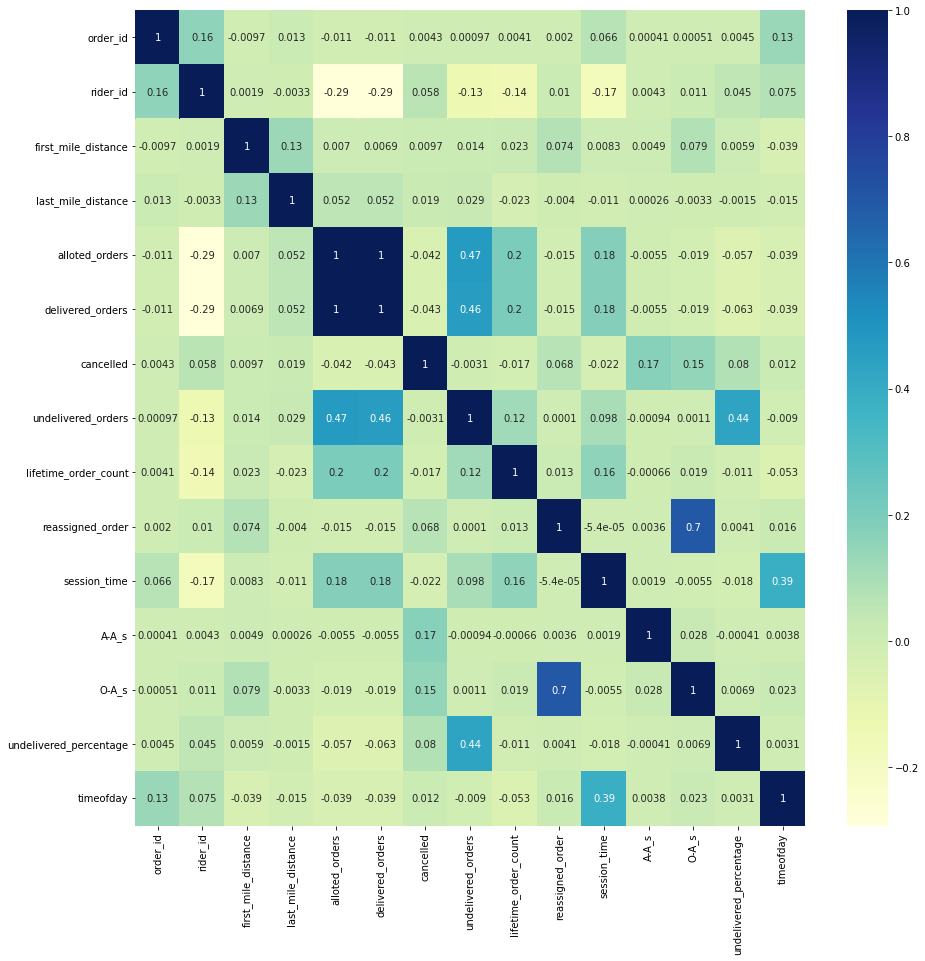

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
sns.heatmap(full.corr(), annot=True, cmap="YlGnBu", ax=ax)

In [ ]:
dfra = full.loc[(full['reassigned_order'] == 1)]
dfnra = full.loc[(full['reassigned_order'] == 0)]

In [ ]:
dfratest = fulltest.loc[(fulltest['reassigned_order'] == 1)]
dfnratest = fulltest.loc[(fulltest['reassigned_order'] == 0)]

In [ ]:
full['reassigned_order'].value_counts()

0.0    436247
1.0     13753
Name: reassigned_order, dtype: int64

In [ ]:
fulltest['reassigned_order'].value_counts()

0.0    140209
1.0      4635
Name: reassigned_order, dtype: int64

In [ ]:
dfrac = dfra.loc[(dfra['cancelled'] == 1)]
dfranc = dfra.loc[(dfra['cancelled'] == 0)]
dfnrac = dfnra.loc[(dfnra['cancelled'] == 1)]
dfnranc = dfnra.loc[(dfnra['cancelled'] == 0)]

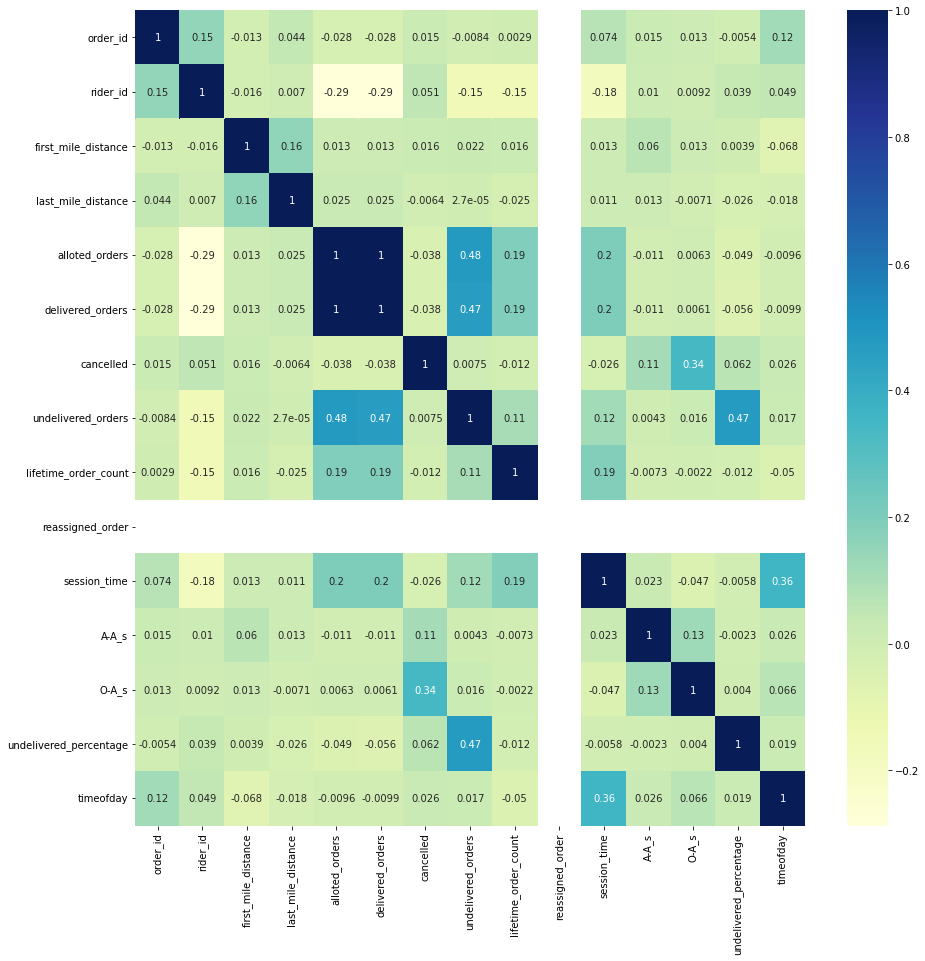

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
sns.heatmap(dfra.corr(), annot=True, cmap="YlGnBu", ax=ax)

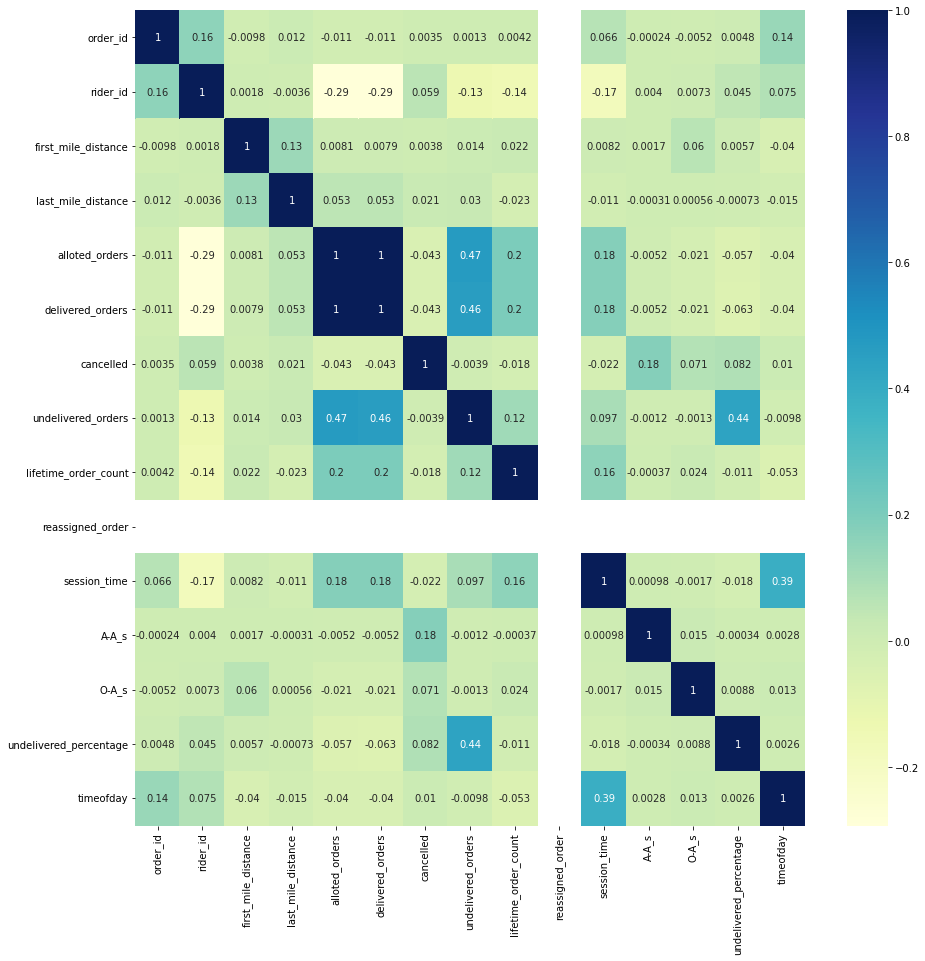

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
sns.heatmap(dfnra.corr(), annot=True, cmap="YlGnBu", ax=ax)

In [ ]:
accepted = df4[df4['accepted'] == 1]
dfcancelled = accepted.loc[(accepted['cancelled'] == 1)]
dfnotcancelled = accepted.loc[(accepted['cancelled'] == 0)]

In [ ]:
df4 = pd.get_dummies(data=df4, columns=['reassignment_method','reassignment_reason'], dummy_na = True)
df4 = pd.get_dummies(data=df4, columns=['Day'])

In [ ]:
dftest = pd.get_dummies(data=dftest, columns=['reassignment_method','reassignment_reason'], dummy_na = True)
dftest = pd.get_dummies(data=dftest, columns=['Day'])

In [ ]:
#pd.factorize(values, sort=False, na_sentinel=- 1, size_hint=None)
df4['reassignment_method'], uniques = pd.factorize(df4['reassignment_method'], na_sentinel=None)
df4['reassignment_reason'], uniques = pd.factorize(df4['reassignment_reason'], na_sentinel=None)

In [ ]:
#pd.factorize(values, sort=False, na_sentinel=- 1, size_hint=None)
dftest['reassignment_method'], uniques = pd.factorize(dftest['reassignment_method'], na_sentinel=None)
dftest['reassignment_reason'], uniques = pd.factorize(dftest['reassignment_reason'], na_sentinel=None)

In [ ]:
df4['reassignment_reason'].value_counts()

3    436247
1      7212
0      5300
2      1241
Name: reassignment_reason, dtype: int64

In [ ]:
df4 = pd.get_dummies(data=df4, columns=['Day'])

In [ ]:
dftest = pd.get_dummies(data=dftest, columns=['Day'])

In [ ]:
dfaccepted = df4[df4['accepted'] == 1]
dfaccepted.shape

(449843, 42)

In [ ]:
dftestaccepted = dftest[dftest['accepted'] == 1]
dftestaccepted.shape

(144776, 33)

In [ ]:
dftestaccepted['Day_Friday'] = dftestaccepted['Day_Monday']*0
dftestaccepted['Day_Thursday'] = dftestaccepted['Day_Monday']*0
dftestaccepted['Day_Wednesday'] = dftestaccepted['Day_Monday']*0

In [ ]:
df4.columns

Index(['order_time', 'order_id', 'order_date', 'allot_time', 'accept_time',
       'pickup_time', 'delivered_time', 'rider_id', 'first_mile_distance',
       'last_mile_distance', 'alloted_orders', 'delivered_orders', 'cancelled',
       'undelivered_orders', 'lifetime_order_count', 'reassigned_order',
       'session_time', 'cancelled_time', 'accept_time_with_outliers',
       'accepted', 'pickedup', 'delivered', 'O-A_time', 'A-A_time', 'A-A_s',
       'O-A_s', 'undelivered_percentage', 'timeofday',
       'reassignment_method_auto', 'reassignment_method_manual',
       'reassignment_method_nan',
       'reassignment_reason_Auto Reassignment basis Inaction. coreengine.tasks.repush_order_to_aa_bucket',
       'reassignment_reason_Reassign',
       'reassignment_reason_Reassignment Request from SE portal.',
       'reassignment_reason_nan', 'Day_Friday', 'Day_Monday', 'Day_Saturday',
       'Day_Sunday', 'Day_Thursday', 'Day_Tuesday', 'Day_Wednesday'],
      dtype='object')

Graphs

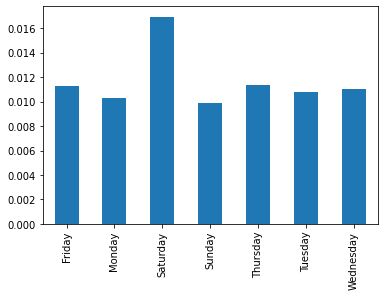

In [ ]:
x = dfcancelled['Day'].value_counts()/(dfnotcancelled['Day'].value_counts()+dfcancelled['Day'].value_counts())
x.plot.bar()

In [ ]:
x = dfrac['Day'].value_counts()/(dfranc['Day'].value_counts()+dfrac['Day'].value_counts())
x.plot.bar()

In [ ]:
x = dfnrac['Day'].value_counts()/(dfnranc['Day'].value_counts()+dfnrac['Day'].value_counts())
x.plot.bar()

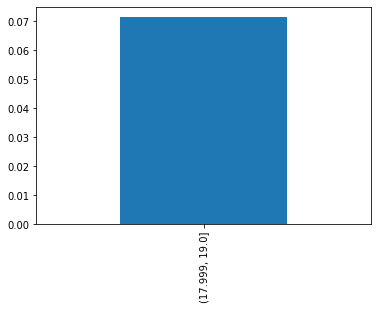

In [ ]:
dfcancelled['timeofday_group'] = pd.cut(dfcancelled['timeofday'], bins = [18,19], include_lowest = True) # bins=[5,18,20], np.linspace(0,24,97)
dfnotcancelled['timeofday_group'] = pd.cut(dfnotcancelled['timeofday'], bins=[18,19], include_lowest = True)
x = dfcancelled['timeofday_group'].value_counts()/(dfnotcancelled['timeofday_group'].value_counts()+dfcancelled['timeofday_group'].value_counts())
x.plot.bar()

In [ ]:
dfrac['timeofday_group'] = pd.cut(dfrac['timeofday'], bins=[18,20], include_lowest = True) # bins=[18,20], np.linspace(0,24,97)
dfranc['timeofday_group'] = pd.cut(dfranc['timeofday'], bins=[18,20], include_lowest = True)
x = dfrac['timeofday_group'].value_counts()/(dfranc['timeofday_group'].value_counts()+dfrac['timeofday_group'].value_counts())
x.plot.bar()

In [ ]:
dfnrac['timeofday_group'] = pd.cut(dfnrac['timeofday'], bins=[18,20], include_lowest = True) # bins=[18,20], np.linspace(0,24,97)
dfnranc['timeofday_group'] = pd.cut(dfnranc['timeofday'], bins=[18,20], include_lowest = True)
x = dfnrac['timeofday_group'].value_counts()/(dfnranc['timeofday_group'].value_counts()+dfnrac['timeofday_group'].value_counts())
x.plot.bar()

In [ ]:
dfnotcancelled['timeofday_group'].value_counts()

(17.999, 19.0]    741
Name: timeofday_group, dtype: int64

In [ ]:
dfcancelled['timeofday_group'].value_counts()

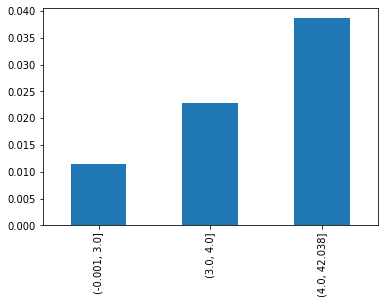

In [ ]:
dfcancelled['first_mile_distance_group'] = pd.cut(dfcancelled['first_mile_distance'], bins=[0,3,4,full['first_mile_distance'].max()], include_lowest = True) # bins = [0,3,4.5,dfcancelled['first_mile_distance'].max()], np.linspace(0,7,141)
dfnotcancelled['first_mile_distance_group'] = pd.cut(dfnotcancelled['first_mile_distance'], bins=[0,3,4,full['first_mile_distance'].max()], include_lowest = True)
x = dfcancelled['first_mile_distance_group'].value_counts()/(dfnotcancelled['first_mile_distance_group'].value_counts()+dfcancelled['first_mile_distance_group'].value_counts())
x.plot.bar()

In [ ]:
dfrac['first_mile_distance_group'] = pd.cut(dfrac['first_mile_distance'], bins=[0,3,4,full['first_mile_distance'].max()], include_lowest = True) # bins = [0,3,4.5,dfcancelled['first_mile_distance'].max()], np.linspace(0,7,141)
dfranc['first_mile_distance_group'] = pd.cut(dfranc['first_mile_distance'], bins=[0,3,4,full['first_mile_distance'].max()], include_lowest = True)
x = dfrac['first_mile_distance_group'].value_counts()/(dfranc['first_mile_distance_group'].value_counts()+dfrac['first_mile_distance_group'].value_counts())
x.plot.bar()

In [ ]:
dfrac['first_mile_distance_group'].value_counts()

In [ ]:
dfranc['first_mile_distance_group'].value_counts()

In [ ]:
dfnrac['first_mile_distance_group'] = pd.cut(dfnrac['first_mile_distance'], bins=[0,3,4,full['first_mile_distance'].max()], include_lowest = True) # bins = [0,3,4,full['first_mile_distance'].max()], np.linspace(0,7,141)
dfnranc['first_mile_distance_group'] = pd.cut(dfnranc['first_mile_distance'], bins=[0,3,4,full['first_mile_distance'].max()], include_lowest = True)
x = dfnrac['first_mile_distance_group'].value_counts()/(dfnranc['first_mile_distance_group'].value_counts()+dfnrac['first_mile_distance_group'].value_counts())
x.plot.bar()

In [ ]:
dfnrac['first_mile_distance_group'].value_counts()

In [ ]:
dfnranc['first_mile_distance_group'].value_counts()

In [ ]:
dfnotcancelled['last_mile_distance'].sort_values()[-20:]

In [ ]:
dfcancelled['last_mile_distance'].sort_values()[-10:]

In [ ]:
dfcancelled['last_mile_distance_group'] = pd.cut(dfcancelled['last_mile_distance'], bins=[0,4,8,full['last_mile_distance'].max()], include_lowest = True) # bins = [0,4,9,dfaccepted['last_mile_distance'].max()], np.linspace(0,15,76)
dfnotcancelled['last_mile_distance_group'] = pd.cut(dfnotcancelled['last_mile_distance'], bins=[0,4,8,full['last_mile_distance'].max()], include_lowest = True)
x = dfcancelled['last_mile_distance_group'].value_counts()/(dfnotcancelled['last_mile_distance_group'].value_counts()+dfcancelled['last_mile_distance_group'].value_counts())
x.plot.bar()

In [ ]:
dfrac['last_mile_distance_group'] = pd.cut(dfrac['last_mile_distance'], bins=[0,1,2,3,7,full['last_mile_distance'].max()], include_lowest = True) # bins = [0,4,9,dfaccepted['last_mile_distance'].max()], np.linspace(0,15,76)
dfranc['last_mile_distance_group'] = pd.cut(dfranc['last_mile_distance'], bins=[0,1,2,3,7,full['last_mile_distance'].max()], include_lowest = True)
x = dfrac['last_mile_distance_group'].value_counts(sort=False)/(dfranc['last_mile_distance_group'].value_counts(sort=False)+dfrac['last_mile_distance_group'].value_counts(sort=False))
x.plot.bar()

In [ ]:
dfrac['last_mile_distance_group'].value_counts(sort=False)

In [ ]:
dfranc['last_mile_distance_group'].value_counts(sort=False)

In [ ]:
dfnrac['last_mile_distance_group'] = pd.cut(dfnrac['last_mile_distance'], bins=[0,4,8,full['last_mile_distance'].max()], include_lowest = True) # bins = [0,4,9,dfaccepted['last_mile_distance'].max()], np.linspace(0,15,76)
dfnranc['last_mile_distance_group'] = pd.cut(dfnranc['last_mile_distance'], bins=[0,4,8,full['last_mile_distance'].max()], include_lowest = True)
x = dfnrac['last_mile_distance_group'].value_counts()/(dfnranc['last_mile_distance_group'].value_counts()+dfnrac['last_mile_distance_group'].value_counts())
x.plot.bar()

In [ ]:
dfcancelled['last_mile_distance_group'].value_counts(sort=False)

In [ ]:
dfnotcancelled['last_mile_distance_group'].value_counts(sort=False)

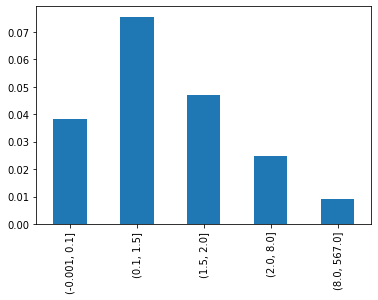

In [ ]:
dfcancelled['alloted_orders_group'] = pd.cut(dfcancelled['alloted_orders'], bins=[0,0.1,1.5,2,8,full['alloted_orders'].max()], include_lowest = True) # bins = [0,0.1,2,20,75,dfcancelled['alloted_orders'].max()], np.linspace(0,100,101)
dfnotcancelled['alloted_orders_group'] = pd.cut(dfnotcancelled['alloted_orders'], bins=[0,0.1,1.5,2,8,full['alloted_orders'].max()], include_lowest = True)
x = dfcancelled['alloted_orders_group'].value_counts()/(dfnotcancelled['alloted_orders_group'].value_counts()+dfcancelled['alloted_orders_group'].value_counts())
x.plot.bar()

In [ ]:
dfcancelled['alloted_orders_group'].value_counts(sort=False)

(-0.001, 0.1]     649
(0.1, 1.5]        226
(1.5, 2.0]        169
(2.0, 8.0]        531
(8.0, 567.0]     3643
Name: alloted_orders_group, dtype: int64

In [ ]:
dfnotcancelled['alloted_orders_group'].value_counts(sort=False)

(-0.001, 0.1]     16299
(0.1, 1.5]         2765
(1.5, 2.0]         3420
(2.0, 8.0]        21006
(8.0, 567.0]     401292
Name: alloted_orders_group, dtype: int64

In [ ]:
dfrac['alloted_orders_group'] = pd.cut(dfrac['alloted_orders'], bins=[0,0.1,2,8,full['alloted_orders'].max()], include_lowest = True) # bins = [0,4,9,dfaccepted['last_mile_distance'].max()], np.linspace(0,15,76)
dfranc['alloted_orders_group'] = pd.cut(dfranc['alloted_orders'], bins=[0,0.1,2,8,full['alloted_orders'].max()], include_lowest = True)
x = dfrac['alloted_orders_group'].value_counts(sort=False)/(dfranc['alloted_orders_group'].value_counts(sort=False)+dfrac['alloted_orders_group'].value_counts(sort=False))
x.plot.bar()

In [ ]:
dfrac['alloted_orders_group'].value_counts(sort=False)

In [ ]:
dfranc['alloted_orders_group'].value_counts(sort=False)

In [ ]:
dfnrac['alloted_orders_group'] = pd.cut(dfnrac['alloted_orders'], bins=[0,0.1,1.5,2,8,full['alloted_orders'].max()], include_lowest = True) # bins = [0,4,9,dfaccepted['last_mile_distance'].max()], np.linspace(0,15,76)
dfnranc['alloted_orders_group'] = pd.cut(dfnranc['alloted_orders'], bins=[0,0.1,1.5,2,8,full['alloted_orders'].max()], include_lowest = True)
x = dfnrac['alloted_orders_group'].value_counts()/(dfnranc['alloted_orders_group'].value_counts()+dfnrac['alloted_orders_group'].value_counts())
x.plot.bar()

In [ ]:
dfcancelled['undelivered_orders_group'] = pd.cut(dfcancelled['undelivered_orders'], bins=[0,4,full['undelivered_orders'].max()], include_lowest = True) # bins = [0,4,dfaccepted['undelivered_orders'].max()]
dfnotcancelled['undelivered_orders_group'] = pd.cut(dfnotcancelled['undelivered_orders'], bins=[0,4,full['undelivered_orders'].max()], include_lowest = True)

x = dfcancelled['undelivered_orders_group'].value_counts()/(dfnotcancelled['undelivered_orders_group'].value_counts() + dfcancelled['undelivered_orders_group'].value_counts())
x.plot.bar()

In [ ]:
dfnotcancelled['undelivered_orders_group'].value_counts()

In [ ]:
dfcancelled['undelivered_orders_group'].value_counts()

In [ ]:
dfrac['undelivered_orders_group'] = pd.cut(dfrac['undelivered_orders'], bins=[0,4,full['undelivered_orders'].max()], include_lowest = True) # bins = [0,4,dfaccepted['undelivered_orders'].max()]
dfranc['undelivered_orders_group'] = pd.cut(dfranc['undelivered_orders'], bins=[0,4,full['undelivered_orders'].max()], include_lowest = True)

x = dfrac['undelivered_orders_group'].value_counts()/(dfranc['undelivered_orders_group'].value_counts() + dfrac['undelivered_orders_group'].value_counts())
x.plot.bar()

In [ ]:
dfnrac['undelivered_orders_group'] = pd.cut(dfnrac['undelivered_orders'], bins=[0,4,full['undelivered_orders'].max()], include_lowest = True) # bins = [0,4,dfaccepted['undelivered_orders'].max()]
dfnranc['undelivered_orders_group'] = pd.cut(dfnranc['undelivered_orders'], bins=[0,4,full['undelivered_orders'].max()], include_lowest = True)

x = dfnrac['undelivered_orders_group'].value_counts()/(dfnranc['undelivered_orders_group'].value_counts() + dfnrac['undelivered_orders_group'].value_counts())
x.plot.bar()

In [ ]:
dfcancelled['lifetime_order_count_group'] = pd.cut(dfcancelled['lifetime_order_count'], bins=[0,0.1,1,2,3,4,10,20,full['lifetime_order_count'].max()], include_lowest = True) # bins = [0,0.1,5000,dfcancelled['lifetime_order_count'].max()], np.linspace(0,8000,101)
dfnotcancelled['lifetime_order_count_group'] = pd.cut(dfnotcancelled['lifetime_order_count'], bins=[0,0.1,1,2,3,4,10,20,full['lifetime_order_count'].max()], include_lowest = True)

x = dfcancelled['lifetime_order_count_group'].value_counts()/(dfnotcancelled['lifetime_order_count_group'].value_counts()+dfcancelled['lifetime_order_count_group'].value_counts())
x.plot.bar()

In [ ]:
dfcancelled['lifetime_order_count_group'].value_counts(sort=False)

In [ ]:
dfnotcancelled['lifetime_order_count_group'].value_counts(sort=False)

In [ ]:
dfrac['lifetime_order_count_group'] = pd.cut(dfrac['lifetime_order_count'], bins=[0,0.1,2,4,20,full['lifetime_order_count'].max()], include_lowest = True) # bins = [0,4,9,dfaccepted['last_mile_distance'].max()], np.linspace(0,15,76)
dfranc['lifetime_order_count_group'] = pd.cut(dfranc['lifetime_order_count'], bins=[0,0.1,2,4,20,full['lifetime_order_count'].max()], include_lowest = True)
x = dfrac['lifetime_order_count_group'].value_counts()/(dfranc['lifetime_order_count_group'].value_counts()+dfrac['lifetime_order_count_group'].value_counts())
x.plot.bar()

In [ ]:
dfrac['lifetime_order_count_group'].value_counts(sort=False)

In [ ]:
dfranc['lifetime_order_count_group'].value_counts(sort=False)

In [ ]:
dfnrac['lifetime_order_count_group'] = pd.cut(dfnrac['lifetime_order_count'], bins=[0,0.1,1,2,3,4,10,20,full['lifetime_order_count'].max()], include_lowest = True) # bins = [0,4,9,dfaccepted['last_mile_distance'].max()], np.linspace(0,15,76)
dfnranc['lifetime_order_count_group'] = pd.cut(dfnranc['lifetime_order_count'], bins=[0,0.1,1,2,3,4,10,20,full['lifetime_order_count'].max()], include_lowest = True)
x = dfnrac['lifetime_order_count_group'].value_counts()/(dfnranc['lifetime_order_count_group'].value_counts()+dfnrac['lifetime_order_count_group'].value_counts())
x.plot.bar()

In [ ]:
dfcancelled['lifetime_order_count_group'].value_counts()

In [ ]:
dfnotcancelled['lifetime_order_count_group'].value_counts()

In [ ]:
dfcancelled['reassignment_method'] = dfcancelled['reassignment_method'].fillna('0')
dfnotcancelled['reassignment_method'] = dfnotcancelled['reassignment_method'].fillna('0')

x = dfcancelled['reassignment_method'].value_counts()/(dfnotcancelled['reassignment_method'].value_counts()+dfcancelled['reassignment_method'].value_counts())
x.plot.bar()

In [ ]:
dfcancelled['reassignment_reason'] = dfcancelled['reassignment_reason'].fillna('0')
dfnotcancelled['reassignment_reason'] = dfnotcancelled['reassignment_reason'].fillna('0')

x = dfcancelled['reassignment_reason'].value_counts()/(dfnotcancelled['reassignment_reason'].value_counts()+ dfcancelled['reassignment_reason'].value_counts())
x.plot.bar()

In [ ]:
dfcancelled['reassigned_order'] = dfcancelled['reassigned_order'].fillna(0)
dfnotcancelled['reassigned_order'] = dfnotcancelled['reassigned_order'].fillna(0)

x = dfcancelled['reassigned_order'].value_counts()/(dfnotcancelled['reassigned_order'].value_counts()+dfcancelled['reassigned_order'].value_counts())
x.plot.bar()

In [ ]:
dfcancelled['session_time_group'] = pd.cut(dfcancelled['session_time'], bins=[0,0.1,5,80,full['session_time'].max()], include_lowest = True) # bins = [0,0.1,5,80,500,750,dfcancelled['session_time'].max()], np.linspace(0,1000,201)
dfnotcancelled['session_time_group'] = pd.cut(dfnotcancelled['session_time'], bins=[0,0.1,5,80,full['session_time'].max()], include_lowest = True)

x = dfcancelled['session_time_group'].value_counts(sort=False)/(dfnotcancelled['session_time_group'].value_counts(sort=False)+dfcancelled['session_time_group'].value_counts(sort=False))
x.plot.bar()

In [ ]:
dfrac['session_time_group'] = pd.cut(dfrac['session_time'], bins=[0,0.1,20,80,full['session_time'].max()], include_lowest = True) # bins = [0,4,9,dfaccepted['last_mile_distance'].max()], np.linspace(0,15,76)
dfranc['session_time_group'] = pd.cut(dfranc['session_time'], bins=[0,0.1,20,80,full['session_time'].max()], include_lowest = True)
x = dfrac['session_time_group'].value_counts(sort=False)/(dfranc['session_time_group'].value_counts(sort=False)+dfrac['session_time_group'].value_counts(sort=False))
x.plot.bar()

In [ ]:
dfrac['session_time_group'].value_counts(sort=False)

In [ ]:
dfranc['session_time_group'].value_counts(sort=False)

In [ ]:
dfnrac['session_time_group'] = pd.cut(dfnrac['session_time'], bins=[0,0.1,5,80,full['session_time'].max()], include_lowest = True) # bins = [0,4,9,dfaccepted['last_mile_distance'].max()], np.linspace(0,15,76)
dfnranc['session_time_group'] = pd.cut(dfnranc['session_time'], bins=[0,0.1,5,80,full['session_time'].max()], include_lowest = True)
x = dfnrac['session_time_group'].value_counts(sort=False)/(dfnranc['session_time_group'].value_counts(sort=False)+dfnrac['session_time_group'].value_counts(sort=False))
x.plot.bar()

In [ ]:
dfcancelled['O-A_s_group'] = pd.cut(dfcancelled['O-A_s'], bins=[full['O-A_s'].min(),2,200,1000,1200,1600,2000,2400,3000,3500,4000,6000,full['O-A_s'].max()], include_lowest = True) # bins=[0,200,400,800,1200,1600,2000,2400,2800,3200,3600,4000,4500,5000,6000,full['O-A_s'].max()], np.linspace(0,8000,21)
dfnotcancelled['O-A_s_group'] = pd.cut(dfnotcancelled['O-A_s'], bins=[full['O-A_s'].min(),2,200,1000,1200,1600,2000,2400,3000,3500,4000,6000,full['O-A_s'].max()], include_lowest = True)

x = dfcancelled['O-A_s_group'].value_counts()/(dfnotcancelled['O-A_s_group'].value_counts()+dfcancelled['O-A_s_group'].value_counts())
x.plot.bar()

In [ ]:
dfrac['O-A_s_group'] = pd.cut(dfrac['O-A_s'], bins=[full['O-A_s'].min(),2,200,1000,1200,1600,2000,2400,3000,3500,4000,6000,full['O-A_s'].max()], include_lowest = True) # bins = [0,4,9,dfaccepted['last_mile_distance'].max()], np.linspace(0,15,76)
dfranc['O-A_s_group'] = pd.cut(dfranc['O-A_s'], bins=[full['O-A_s'].min(),2,200,1000,1200,1600,2000,2400,3000,3500,4000,6000,full['O-A_s'].max()], include_lowest = True)
x = dfrac['O-A_s_group'].value_counts(sort=False)/(dfranc['O-A_s_group'].value_counts(sort=False)+dfrac['O-A_s_group'].value_counts(sort=False))
x.plot.bar()

In [ ]:
dfrac['O-A_s_group'].value_counts(sort=False)

In [ ]:
dfnrac['O-A_s_group'] = pd.cut(dfnrac['O-A_s'], bins=[full['O-A_s'].min(),2,200,1000,1200,1600,2000,3000,3500,6000,full['O-A_s'].max()], include_lowest = True) # bins = [0,4,9,dfaccepted['last_mile_distance'].max()], np.linspace(0,15,76)
dfnranc['O-A_s_group'] = pd.cut(dfnranc['O-A_s'], bins=[full['O-A_s'].min(),2,200,1000,1200,1600,2000,3000,3500,6000,full['O-A_s'].max()], include_lowest = True)
x = dfnrac['O-A_s_group'].value_counts(sort=False)/(dfnranc['O-A_s_group'].value_counts(sort=False)+dfnrac['O-A_s_group'].value_counts(sort=False))
x.plot.bar()

In [ ]:
dfnrac['O-A_s_group'].value_counts(sort=False)

In [ ]:
dfnranc['O-A_s_group'].value_counts(sort=False)

In [ ]:
dfcancelled['A-A_s_group'] = pd.cut(dfcancelled['A-A_s'], bins=[full['A-A_s'].min(),0,3,4,90,300,700,800,950,full['A-A_s'].max()], include_lowest = True) # bins = [0,90,600,900,dfcancelled['A-A_s']] , np.linspace(0,900,201)
dfnotcancelled['A-A_s_group'] = pd.cut(dfnotcancelled['A-A_s'], bins=[full['A-A_s'].min(),0,3,4,90,300,700,800,950,full['A-A_s'].max()], include_lowest = True)

x = dfcancelled['A-A_s_group'].value_counts()/(dfnotcancelled['A-A_s_group'].value_counts()+dfcancelled['A-A_s_group'].value_counts())
x.plot.bar()

In [ ]:
dfrac['A-A_s_group'] = pd.cut(dfrac['A-A_s'], bins=[0,4,90,300,950], include_lowest = True) # bins = [0,4,9,dfaccepted['last_mile_distance'].max()], np.linspace(0,15,76)
dfranc['A-A_s_group'] = pd.cut(dfranc['A-A_s'], bins=[0,4,90,300,950], include_lowest = True)
x = dfrac['A-A_s_group'].value_counts(sort=False)/(dfranc['A-A_s_group'].value_counts(sort=False)+dfrac['A-A_s_group'].value_counts(sort=False))
x.plot.bar()

In [ ]:
dfrac['A-A_s_group'].value_counts(sort=False)

In [ ]:
dfranc['A-A_s_group'].value_counts(sort=False)

In [ ]:
dfnrac['A-A_s_group'] = pd.cut(dfnrac['A-A_s'], bins=[0,3,4,90,300,700,800,950], include_lowest = True) # bins = [0,4,9,dfaccepted['last_mile_distance'].max()], np.linspace(0,15,76)
dfnranc['A-A_s_group'] = pd.cut(dfnranc['A-A_s'], bins=[0,3,4,90,300,700,800,950], include_lowest = True)
x = dfnrac['A-A_s_group'].value_counts()/(dfnranc['A-A_s_group'].value_counts()+dfnrac['A-A_s_group'].value_counts())
x.plot.bar()

In [ ]:
dfcancelled['undelivered_percentage_group'] = pd.cut(dfcancelled['undelivered_percentage'], bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,1], include_lowest = True) # bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,1]
dfnotcancelled['undelivered_percentage_group'] = pd.cut(dfnotcancelled['undelivered_percentage'], bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,1], include_lowest = True)

x = dfcancelled['undelivered_percentage_group'].value_counts(sort=False)/(dfnotcancelled['undelivered_percentage_group'].value_counts(sort=False)+dfcancelled['undelivered_percentage_group'].value_counts(sort=False))
x.plot.bar()

In [ ]:
dfrac['undelivered_percentage_group'] = pd.cut(dfrac['undelivered_percentage'], bins=[0,0.1,0.25,0.35,1], include_lowest = True) # bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,1]
dfranc['undelivered_percentage_group'] = pd.cut(dfranc['undelivered_percentage'], bins=[0,0.1,0.25,0.35,1], include_lowest = True)
x = dfrac['undelivered_percentage_group'].value_counts(sort=False)/(dfranc['undelivered_percentage_group'].value_counts(sort=False)+dfrac['undelivered_percentage_group'].value_counts(sort=False))
x.plot.bar()

In [ ]:
dfnrac['undelivered_percentage_group'] = pd.cut(dfnrac['undelivered_percentage'], bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,1], include_lowest = True) # bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,1]
dfnranc['undelivered_percentage_group'] = pd.cut(dfnranc['undelivered_percentage'], bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,1], include_lowest = True)
x = dfnrac['undelivered_percentage_group'].value_counts(sort=False)/(dfnranc['undelivered_percentage_group'].value_counts(sort=False)+dfnrac['undelivered_percentage_group'].value_counts(sort=False))
x.plot.bar()

In [ ]:
dfcancelled['undelivered_percentage_group'].value_counts(sort=False)

**Scaled Data**

In [ ]:
scaler = MinMaxScaler()

cols_to_scale_minmax = ['first_mile_distance', 'last_mile_distance', 'alloted_orders', 'undelivered_orders', 'lifetime_order_count', 'session_time', 'A-A_s', 'O-A_s',
                        'undelivered_percentage', 'timeofday']

dfaccepted[cols_to_scale_minmax] = scaler.fit_transform(dfaccepted[cols_to_scale_minmax])
dftestaccepted[cols_to_scale_minmax] = scaler.fit_transform(dftestaccepted[cols_to_scale_minmax])

In [ ]:
#dfaccepted['first_mile_distance_robust'] = 1-np.exp(-dfaccepted['first_mile_distance']*20)
#dfaccepted['last_mile_distance_robust'] = 1-np.exp(-dfaccepted['last_mile_distance']*2)
#dfaccepted['O-A_s_robust'] = 1-np.exp(-dfaccepted['O-A_s']*8)

In [ ]:
#dftestaccepted['first_mile_distance_robust'] = 1-np.exp(-dfaccepted['first_mile_distance']*20)
#dftestaccepted['last_mile_distance_robust'] = 1-np.exp(-dfaccepted['last_mile_distance']*2)
#dftestaccepted['O-A_s_robust'] = 1-np.exp(-dfaccepted['O-A_s']*8)

In [ ]:
dfaccepted.head()

In [ ]:
dftestaccepted.head()

In [ ]:
dfaccepted1 = dfaccepted.drop(columns = ['order_time', 'order_id', 'order_date', 'allot_time', 'accept_time', 'pickup_time', 'delivered_time', 'rider_id', 'delivered_orders',
                                         'first_mile_distance', 'last_mile_distance', 'lifetime_order_count', 'O-A_s', 'undelivered_percentage',
                                         'cancelled_time', 'accept_time_with_outliers', 'accepted', 'pickedup', 'delivered', 'O-A_time', 'A-A_time'])

In [ ]:
dfacceptedDT = dfaccepted[['first_mile_distance', 'last_mile_distance', 'alloted_orders', 'undelivered_orders', 'reassigned_order',	
                         'session_time',	'A-A_s',	'O-A_s',	'undelivered_percentage',	'timeofday',	'reassignment_method_auto',	'reassignment_method_manual',
                         'reassignment_method_nan',	'reassignment_reason_Auto Reassignment basis Inaction. coreengine.tasks.repush_order_to_aa_bucket',
                         'reassignment_reason_Reassign',  'reassignment_reason_Reassignment Request from SE portal.',	'reassignment_reason_nan',
                         'Day_Monday',	'Day_Saturday',	'Day_Sunday',	'Day_Tuesday',	'Day_Friday',	'Day_Thursday',	'Day_Wednesday', 'cancelled']]

In [ ]:
dftestacceptedDT = dftestaccepted[['first_mile_distance', 'last_mile_distance', 'alloted_orders', 'undelivered_orders', 'reassigned_order',	
                         'session_time',	'A-A_s',	'O-A_s',	'undelivered_percentage',	'timeofday',	'reassignment_method_auto',	'reassignment_method_manual',
                         'reassignment_method_nan',	'reassignment_reason_Auto Reassignment basis Inaction. coreengine.tasks.repush_order_to_aa_bucket',
                         'reassignment_reason_Reassign',  'reassignment_reason_Reassignment Request from SE portal.',	'reassignment_reason_nan',
                         'Day_Monday',	'Day_Saturday',	'Day_Sunday',	'Day_Tuesday',	'Day_Friday',	'Day_Thursday',	'Day_Wednesday']]

In [ ]:
dfaccepted1

In [ ]:
dftestaccepted1 = dftestaccepted[['alloted_orders', 'undelivered_orders', 'reassigned_order',	
                         'session_time',	'A-A_s',	'timeofday',	'reassignment_method_auto',	'reassignment_method_manual',
                         'reassignment_method_nan',	'reassignment_reason_Auto Reassignment basis Inaction. coreengine.tasks.repush_order_to_aa_bucket',
                         'reassignment_reason_Reassign',  'reassignment_reason_Reassignment Request from SE portal.',	'reassignment_reason_nan',
                         'Day_Friday', 'Day_Monday',	'Day_Saturday',	'Day_Sunday',	'Day_Thursday', 'Day_Tuesday',	'Day_Wednesday', 
                         'last_mile_distance_robust', 'O-A_s_robust', 'first_mile_distance_robust']]

In [ ]:
dftestaccepted1

In [ ]:
dfaccepted = dfaccepted[['first_mile_distance', 'last_mile_distance', 'alloted_orders', 'undelivered_orders', 'lifetime_order_count', 'reassigned_order',	
                         'session_time',	'A-A_s',	'O-A_s',	'undelivered_percentage',	'timeofday',	'reassignment_method_auto',	'reassignment_method_manual',
                         'reassignment_method_nan',	'reassignment_reason_Auto Reassignment basis Inaction. coreengine.tasks.repush_order_to_aa_bucket',
                         'reassignment_reason_Reassign',  'reassignment_reason_Reassignment Request from SE portal.',	'reassignment_reason_nan',
                         'Day_Monday',	'Day_Saturday',	'Day_Sunday',	'Day_Tuesday',	'Day_Friday',	'Day_Thursday',	'Day_Wednesday', 'cancelled']]
dftestaccepted = dftestaccepted[['first_mile_distance', 'last_mile_distance', 'alloted_orders', 'undelivered_orders', 'lifetime_order_count', 'reassigned_order',	
                         'session_time',	'A-A_s',	'O-A_s',	'undelivered_percentage',	'timeofday',	'reassignment_method_auto',	'reassignment_method_manual',
                         'reassignment_method_nan',	'reassignment_reason_Auto Reassignment basis Inaction. coreengine.tasks.repush_order_to_aa_bucket',
                         'reassignment_reason_Reassign',  'reassignment_reason_Reassignment Request from SE portal.',	'reassignment_reason_nan',
                         'Day_Monday',	'Day_Saturday',	'Day_Sunday',	'Day_Tuesday',	'Day_Friday',	'Day_Thursday',	'Day_Wednesday']]

In [ ]:
dfaccepted.head()

In [ ]:
dftestaccepted.head()

**Data with bins**

In [ ]:
dfaccepted['timeofday_group'] = pd.cut(dfaccepted['timeofday'], bins=[5,18,19], include_lowest = True)
dfaccepted['first_mile_distance_group'] = pd.cut(dfaccepted['first_mile_distance'], bins=[0,3,4,dfaccepted['first_mile_distance'].max()], include_lowest = True)
dfaccepted['last_mile_distance_group'] = pd.cut(dfaccepted['last_mile_distance'], bins=[0,4,8,dfaccepted['last_mile_distance'].max()], include_lowest = True)
dfaccepted['alloted_orders_group'] = pd.cut(dfaccepted['alloted_orders'], bins=[0,0.1,1.5,2,8,dfaccepted['alloted_orders'].max()], include_lowest = True)
dfaccepted['undelivered_orders_group'] = pd.cut(dfaccepted['undelivered_orders'], bins=[0,4,dfaccepted['undelivered_orders'].max()], include_lowest = True)
dfaccepted['lifetime_order_count_group'] = pd.cut(dfaccepted['lifetime_order_count'], bins=[0,0.1,1,2,3,4,10,20,dfaccepted['lifetime_order_count'].max()], include_lowest = True)
dfaccepted['session_time_group'] = pd.cut(dfaccepted['session_time'], bins=[0,0.1,5,80,dfaccepted['session_time'].max()], include_lowest = True)
#dfaccepted['O-A_s_group'] = bins=[5,18,19]
dfaccepted['A-A_s_group'] = pd.cut(dfaccepted['A-A_s'], bins=[dfaccepted['A-A_s'].min(),0,3,4,90,600,dfaccepted['A-A_s'].max()], include_lowest = True)


In [ ]:
nbins = len(dfaccepted['timeofday_group'].unique())

In [ ]:
dfaccepted.columns
for i in dfaccepted.columns:
  print(i, dfaccepted[i].isnull().values.sum())

In [ ]:
#dfaccepted = pd.get_dummies(data=dfaccepted, columns=['timeofday_group'], dummy_na = True)
dfaccepted = pd.get_dummies(data=dfaccepted, columns=['first_mile_distance_group', 'last_mile_distance_group', 'alloted_orders_group', 'undelivered_orders_group',
                                                      'lifetime_order_count_group', 'session_time_group', 'A-A_s_group', 'timeofday_group'])

In [ ]:
dfaccepted.columns

In [ ]:
dfbins = dfaccepted[['cancelled', 'reassigned_order', 'reassignment_method_auto',	'reassignment_method_manual',	'reassignment_method_nan',	
                     'reassignment_reason_Auto Reassignment basis Inaction. coreengine.tasks.repush_order_to_aa_bucket',	'reassignment_reason_Reassign',
                     'reassignment_reason_Reassignment Request from SE portal.', 'reassignment_reason_nan', 'Day_Saturday',
                     'first_mile_distance_group_(-0.001, 3.0]',	'first_mile_distance_group_(3.0, 4.0]',	'first_mile_distance_group_(4.0, 42.038]',
                     'last_mile_distance_group_(-0.001, 4.0]', 'last_mile_distance_group_(4.0, 8.0]', 'last_mile_distance_group_(8.0, 22.41]',
       'alloted_orders_group_(-0.001, 0.1]', 'alloted_orders_group_(0.1, 1.5]',
       'alloted_orders_group_(1.5, 2.0]', 'alloted_orders_group_(2.0, 8.0]',
       'alloted_orders_group_(8.0, 567.0]',
       'undelivered_orders_group_(-0.001, 4.0]',
       'undelivered_orders_group_(4.0, 9.0]',
       'lifetime_order_count_group_(-0.001, 0.1]',
       'lifetime_order_count_group_(0.1, 1.0]',
       'lifetime_order_count_group_(1.0, 2.0]',
       'lifetime_order_count_group_(2.0, 3.0]',
       'lifetime_order_count_group_(3.0, 4.0]',
       'lifetime_order_count_group_(4.0, 10.0]',
       'lifetime_order_count_group_(10.0, 20.0]',
       'lifetime_order_count_group_(20.0, 30469.0]',
       'session_time_group_(-0.001, 0.1]', 'session_time_group_(0.1, 5.0]',
       'session_time_group_(5.0, 80.0]', 'session_time_group_(80.0, 1298.967]',
       'A-A_s_group_(-28534.001, 0.0]', 'A-A_s_group_(0.0, 3.0]',
       'A-A_s_group_(3.0, 4.0]', 'A-A_s_group_(4.0, 90.0]',
       'A-A_s_group_(90.0, 600.0]', 'A-A_s_group_(600.0, 930.0]',
       'timeofday_group_(4.999, 18.0]', 'timeofday_group_(18.0, 19.0]']]

In [ ]:
len(dfbins.columns)

43

**Linearizing with bins**

In [ ]:
def linearize(dataframe, col_name, dfcancelled = dfcancelled, dfnotcancelled = dfnotcancelled):
  dictionary = (dfcancelled[col_name].value_counts()/(dfnotcancelled[col_name].value_counts()+dfcancelled[col_name].value_counts()))
  dataframe[col_name].replace(dictionary, inplace = True)

In [ ]:
full['reassignment_method'] = full['reassignment_method'].fillna('0')
full['reassignment_reason'] = full['reassignment_reason'].fillna('0')

In [ ]:
fulltest['reassignment_method'] = fulltest['reassignment_method'].fillna('0')
fulltest['reassignment_reason'] = fulltest['reassignment_reason'].fillna('0')

In [ ]:
full['timeofday_group'] = pd.cut(full['timeofday'], bins = [18,19], include_lowest = True)
full = pd.get_dummies(data=full, columns=['timeofday_group'], dummy_na = True)

In [ ]:
fulltest['timeofday_group'] = pd.cut(fulltest['timeofday'], bins = [18,19], include_lowest = True)
fulltest = pd.get_dummies(data=fulltest, columns=['timeofday_group'], dummy_na = True)

In [ ]:
full['timeofday_group_(17.999, 19.0]'] = ((dfcancelled['timeofday_group'].value_counts()/(dfnotcancelled['timeofday_group'].value_counts()+dfcancelled['timeofday_group'].value_counts()))[0])*full['timeofday_group_(17.999, 19.0]']

In [ ]:
fulltest['timeofday_group_(17.999, 19.0]'] = ((dfcancelled['timeofday_group'].value_counts()/(dfnotcancelled['timeofday_group'].value_counts()+dfcancelled['timeofday_group'].value_counts()))[0])*fulltest['timeofday_group_(17.999, 19.0]']

In [ ]:
full['timeofday_group_nan'] = (len(dfcancelled)/(len(dfnotcancelled)+len(dfcancelled)))*full['timeofday_group_nan']
full['timeofday_group'] = full['timeofday_group_(17.999, 19.0]'] + full['timeofday_group_nan']

In [ ]:
fulltest['timeofday_group_nan'] = (len(dfcancelled)/(len(dfnotcancelled)+len(dfcancelled)))*fulltest['timeofday_group_nan']
fulltest['timeofday_group'] = fulltest['timeofday_group_(17.999, 19.0]'] + fulltest['timeofday_group_nan']

In [ ]:
full['timeofday_group'].value_counts()

0.011596    449202
0.071429       798
Name: timeofday_group, dtype: int64

In [ ]:
fulltest['timeofday_group'].value_counts()

0.011596    144453
0.071429       391
Name: timeofday_group, dtype: int64

In [ ]:
full['first_mile_distance_group'] = pd.cut(full['first_mile_distance'], bins=[0,3,4,full['first_mile_distance'].max()], include_lowest = True)
full['last_mile_distance_group'] = pd.cut(full['last_mile_distance'], bins=[0,4,8,full['last_mile_distance'].max()], include_lowest = True)
full['alloted_orders_group'] = pd.cut(full['alloted_orders'], bins=[0,0.1,1.5,2,8,full['alloted_orders'].max()], include_lowest = True)
full['undelivered_orders_group'] = pd.cut(full['undelivered_orders'], bins=[0,4,full['undelivered_orders'].max()], include_lowest = True)
full['lifetime_order_count_group'] = pd.cut(full['lifetime_order_count'], bins=[0,0.1,1,2,3,4,10,20,full['lifetime_order_count'].max()], include_lowest = True)
full['session_time_group'] = pd.cut(full['session_time'], bins=[0,0.1,5,80,full['session_time'].max()], include_lowest = True)
full['O-A_s_group'] = pd.cut(full['O-A_s'], bins=[full['O-A_s'].min(),2,200,1000,1200,1600,2000,2400,3000,3500,4000,6000,full['O-A_s'].max()], include_lowest = True)
full['A-A_s_group'] = pd.cut(full['A-A_s'], bins=[full['A-A_s'].min(),0,3,4,90,300,700,800,950,full['A-A_s'].max()], include_lowest = True)

In [ ]:
fulltest['first_mile_distance_group'] = pd.cut(fulltest['first_mile_distance'], bins=[0,3,4,full['first_mile_distance'].max()], include_lowest = True)
fulltest['last_mile_distance_group'] = pd.cut(fulltest['last_mile_distance'], bins=[0,4,8,full['last_mile_distance'].max()], include_lowest = True)
fulltest['alloted_orders_group'] = pd.cut(fulltest['alloted_orders'], bins=[0,0.1,1.5,2,8,full['alloted_orders'].max()], include_lowest = True)
fulltest['undelivered_orders_group'] = pd.cut(fulltest['undelivered_orders'], bins=[0,4,full['undelivered_orders'].max()], include_lowest = True)
fulltest['lifetime_order_count_group'] = pd.cut(fulltest['lifetime_order_count'], bins=[0,0.1,1,2,3,4,10,20,full['lifetime_order_count'].max()], include_lowest = True)
fulltest['session_time_group'] = pd.cut(fulltest['session_time'], bins=[0,0.1,5,80,full['session_time'].max()], include_lowest = True)
fulltest['O-A_s_group'] = pd.cut(fulltest['O-A_s'], bins=[full['O-A_s'].min(),2,200,1000,1200,1600,2000,2400,3000,3500,4000,6000,full['O-A_s'].max()], include_lowest = True)
fulltest['A-A_s_group'] = pd.cut(fulltest['A-A_s'], bins=[full['A-A_s'].min(),0,3,4,90,300,700,800,950,full['A-A_s'].max()], include_lowest = True)

In [ ]:
linearize(full, 'reassignment_method')
linearize(full, 'reassignment_reason')
linearize(full, 'timeofday_group')
linearize(full, 'first_mile_distance_group')
linearize(full, 'last_mile_distance_group')
linearize(full, 'alloted_orders_group')
linearize(full, 'undelivered_orders_group')
linearize(full, 'lifetime_order_count_group')
linearize(full, 'session_time_group')
linearize(full, 'A-A_s_group')
linearize(full, 'O-A_s_group')
linearize(full, 'Day')
linearize(full, 'reassigned_order')

In [ ]:
linearize(fulltest, 'reassignment_method')
linearize(fulltest, 'reassignment_reason')
linearize(fulltest, 'timeofday_group')
linearize(fulltest, 'first_mile_distance_group')
linearize(fulltest, 'last_mile_distance_group')
linearize(fulltest, 'alloted_orders_group')
linearize(fulltest, 'undelivered_orders_group')
linearize(fulltest, 'lifetime_order_count_group')
linearize(fulltest, 'session_time_group')
linearize(fulltest, 'A-A_s_group')
linearize(fulltest, 'O-A_s_group')
linearize(fulltest, 'Day')
linearize(fulltest, 'reassigned_order')

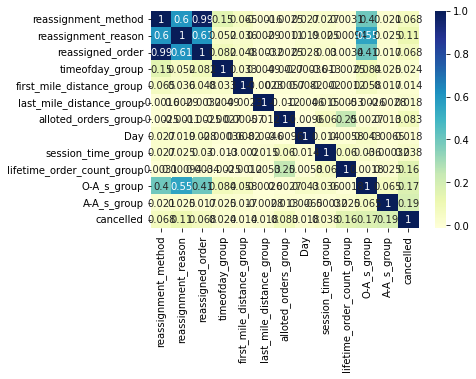

<Figure size 1440x1440 with 0 Axes>

In [ ]:
dataplot = sns.heatmap(dflinearize.corr(), cmap="YlGnBu", annot=True)
plt.figure(figsize=(20, 20))
plt.show()

**Model**

In [ ]:
df4.columns

Index(['order_time', 'order_id', 'order_date', 'allot_time', 'accept_time',
       'pickup_time', 'delivered_time', 'rider_id', 'first_mile_distance',
       'last_mile_distance', 'alloted_orders', 'delivered_orders', 'cancelled',
       'undelivered_orders', 'lifetime_order_count', 'reassigned_order',
       'session_time', 'cancelled_time', 'accept_time_with_outliers',
       'accepted', 'pickedup', 'delivered', 'O-A_time', 'A-A_time', 'A-A_s',
       'O-A_s', 'undelivered_percentage', 'timeofday',
       'reassignment_method_auto', 'reassignment_method_manual',
       'reassignment_method_nan',
       'reassignment_reason_Auto Reassignment basis Inaction. coreengine.tasks.repush_order_to_aa_bucket',
       'reassignment_reason_Reassign',
       'reassignment_reason_Reassignment Request from SE portal.',
       'reassignment_reason_nan', 'Day_Friday', 'Day_Monday', 'Day_Saturday',
       'Day_Sunday', 'Day_Thursday', 'Day_Tuesday', 'Day_Wednesday'],
      dtype='object')

In [ ]:
dfsimple = df4[['first_mile_distance',
       'last_mile_distance', 'alloted_orders', 'delivered_orders',
       'undelivered_orders', 'lifetime_order_count', 'reassigned_order',
       'session_time', 'A-A_s', 'O-A_s',
       'reassignment_method_auto', 'reassignment_method_manual',
       'reassignment_method_nan',
       'reassignment_reason_Auto Reassignment basis Inaction. coreengine.tasks.repush_order_to_aa_bucket',
       'reassignment_reason_Reassign',
       'reassignment_reason_Reassignment Request from SE portal.',
       'reassignment_reason_nan',
       'Day_Saturday','timeofday','cancelled'
       ]]

In [ ]:
dfsimpletest = dftest[['first_mile_distance',
       'last_mile_distance', 'alloted_orders', 'delivered_orders',
       'undelivered_orders', 'lifetime_order_count', 'reassigned_order',
       'session_time', 'A-A_s', 'O-A_s',
       'reassignment_method_auto', 'reassignment_method_manual',
       'reassignment_method_nan',
       'reassignment_reason_Auto Reassignment basis Inaction. coreengine.tasks.repush_order_to_aa_bucket',
       'reassignment_reason_Reassign',
       'reassignment_reason_Reassignment Request from SE portal.',
       'reassignment_reason_nan',
       'Day_Saturday','timeofday'
       ]]

In [ ]:
dfsimpletest1 = dfsimpletest.copy()

In [ ]:
dfsimple['A-A_s'] = np.where((dfsimple['A-A_s'] >= 1000), 1000, dfsimple['A-A_s'])
dfsimple['A-A_s'] = np.where((dfsimple['A-A_s'] <= 0), 1000, dfsimple['A-A_s'])

In [ ]:
dfsimpletest1['A-A_s'] = np.where((dfsimpletest1['A-A_s'] >= 1000), 1000, dfsimpletest1['A-A_s'])
dfsimpletest1['A-A_s'] = np.where((dfsimpletest1['A-A_s'] <= 0), 1000, dfsimpletest1['A-A_s'])

In [ ]:
dfsimple['first_mile_distance'] = np.where(dfsimple['first_mile_distance'] < 100, dfsimple['first_mile_distance']//1, dfsimple['first_mile_distance'])
#dfsimple['first_mile_distance'] = np.where((dfsimple['first_mile_distance'] >= 10)&(dfsimple['first_mile_distance'] < 100), (dfsimple['first_mile_distance']//10)*10, dfsimple['first_mile_distance'])

In [ ]:
dfsimpletest1['first_mile_distance'] = np.where(dfsimpletest1['first_mile_distance'] < 100, dfsimpletest1['first_mile_distance']//1, dfsimpletest1['first_mile_distance'])
#dfsimpletest1['first_mile_distance'] = np.where((dfsimpletest1['first_mile_distance'] >= 10)&(dfsimpletest1['first_mile_distance'] < 100), (dfsimpletest1['first_mile_distance']//10)*10, dfsimpletest1['first_mile_distance'])

In [ ]:
dfsimple['last_mile_distance'] = np.where(dfsimple['last_mile_distance'] < 100, dfsimple['last_mile_distance']//1, dfsimple['last_mile_distance'])
#dfsimple['last_mile_distance'] = np.where((dfsimple['last_mile_distance'] >= 10)&(dfsimple['last_mile_distance'] < 100), (dfsimple['last_mile_distance']//10)*10, dfsimple['last_mile_distance'])

In [ ]:
dfsimpletest1['last_mile_distance'] = np.where(dfsimpletest1['last_mile_distance'] < 100, dfsimpletest1['last_mile_distance']//1, dfsimpletest1['last_mile_distance'])
#dfsimpletest1['last_mile_distance'] = np.where((dfsimpletest1['last_mile_distance'] >= 10)&(dfsimpletest1['last_mile_distance'] < 100), (dfsimpletest1['last_mile_distance']//10)*10, dfsimpletest1['last_mile_distance'])

In [ ]:
dfsimple['alloted_orders'] = np.where(dfsimple['alloted_orders'] < 10, dfsimple['alloted_orders']//1, dfsimple['alloted_orders'])
dfsimple['alloted_orders'] = np.where((dfsimple['alloted_orders'] >= 10)&(dfsimple['alloted_orders'] < 100), (dfsimple['alloted_orders']//10)*10, dfsimple['alloted_orders'])
dfsimple['alloted_orders'] = np.where((dfsimple['alloted_orders'] >= 100)&(dfsimple['alloted_orders'] < 1000), (dfsimple['alloted_orders']//100)*100, dfsimple['alloted_orders'])

In [ ]:
dfsimpletest1['alloted_orders'] = np.where(dfsimpletest1['alloted_orders'] < 10, dfsimpletest1['alloted_orders']//1, dfsimpletest1['alloted_orders'])
dfsimpletest1['alloted_orders'] = np.where((dfsimpletest1['alloted_orders'] >= 10)&(dfsimpletest1['alloted_orders'] < 100), (dfsimpletest1['alloted_orders']//10)*10, dfsimpletest1['alloted_orders'])
dfsimpletest1['alloted_orders'] = np.where((dfsimpletest1['alloted_orders'] >= 100)&(dfsimpletest1['alloted_orders'] < 1000), (dfsimpletest1['alloted_orders']//100)*100, dfsimpletest1['alloted_orders'])

In [ ]:
dfsimple['delivered_orders'] = np.where(dfsimple['delivered_orders'] < 10, dfsimple['delivered_orders']//1, dfsimple['delivered_orders'])
dfsimple['delivered_orders'] = np.where((dfsimple['delivered_orders'] >= 10)&(dfsimple['delivered_orders'] < 100), (dfsimple['delivered_orders']//10)*10, dfsimple['delivered_orders'])
dfsimple['delivered_orders'] = np.where((dfsimple['delivered_orders'] >= 100)&(dfsimple['delivered_orders'] < 1000), (dfsimple['delivered_orders']//100)*100, dfsimple['delivered_orders'])

In [ ]:
dfsimpletest1['delivered_orders'] = np.where(dfsimpletest1['delivered_orders'] < 10, dfsimpletest1['delivered_orders']//1, dfsimpletest1['delivered_orders'])
dfsimpletest1['delivered_orders'] = np.where((dfsimpletest1['delivered_orders'] >= 10)&(dfsimpletest1['delivered_orders'] < 100), (dfsimpletest1['delivered_orders']//10)*10, dfsimpletest1['delivered_orders'])
dfsimpletest1['delivered_orders'] = np.where((dfsimpletest1['delivered_orders'] >= 100)&(dfsimpletest1['delivered_orders'] < 1000), (dfsimpletest1['delivered_orders']//100)*100, dfsimpletest1['delivered_orders'])

In [ ]:
dfsimple['A-A_s'] = np.where(dfsimple['A-A_s'] < 10, dfsimple['A-A_s']//1, dfsimple['A-A_s'])
dfsimple['A-A_s'] = np.where((dfsimple['A-A_s'] >= 10)&(dfsimple['A-A_s'] < 100), (dfsimple['A-A_s']//10)*10, dfsimple['A-A_s'])
dfsimple['A-A_s'] = np.where((dfsimple['A-A_s'] >= 100)&(dfsimple['A-A_s'] < 1000), (dfsimple['A-A_s']//100)*100, dfsimple['A-A_s'])

In [ ]:
dfsimpletest1['A-A_s'] = np.where(dfsimpletest1['A-A_s'] < 10, dfsimpletest1['A-A_s']//1, dfsimpletest1['A-A_s'])
dfsimpletest1['A-A_s'] = np.where((dfsimpletest1['A-A_s'] >= 10)&(dfsimpletest1['A-A_s'] < 100), (dfsimpletest1['A-A_s']//10)*10, dfsimpletest1['A-A_s'])
dfsimpletest1['A-A_s'] = np.where((dfsimpletest1['A-A_s'] >= 100)&(dfsimpletest1['A-A_s'] < 1000), (dfsimpletest1['A-A_s']//100)*100, dfsimpletest1['A-A_s'])

In [ ]:
dfsimple['O-A_s'] = np.where(dfsimple['O-A_s'] < 10, dfsimple['O-A_s']//1, dfsimple['O-A_s'])
dfsimple['O-A_s'] = np.where((dfsimple['O-A_s'] >= 10)&(dfsimple['O-A_s'] < 100), (dfsimple['O-A_s']//10)*10, dfsimple['O-A_s'])
dfsimple['O-A_s'] = np.where((dfsimple['O-A_s'] >= 100)&(dfsimple['O-A_s'] < 1000), (dfsimple['O-A_s']//100)*100, dfsimple['O-A_s'])
dfsimple['O-A_s'] = np.where((dfsimple['O-A_s'] >= 1000)&(dfsimple['O-A_s'] < 10000), (dfsimple['O-A_s']//1000)*1000, dfsimple['O-A_s'])
dfsimple['O-A_s'] = np.where((dfsimple['O-A_s'] >= 10000)&(dfsimple['O-A_s'] < 100000), (dfsimple['O-A_s']//10000)*10000, dfsimple['O-A_s'])

In [ ]:
dfsimpletest1['O-A_s'] = np.where(dfsimpletest1['O-A_s'] < 10, dfsimpletest1['O-A_s']//1, dfsimpletest1['O-A_s'])
dfsimpletest1['O-A_s'] = np.where((dfsimpletest1['O-A_s'] >= 10)&(dfsimpletest1['O-A_s'] < 100), (dfsimpletest1['O-A_s']//10)*10, dfsimpletest1['O-A_s'])
dfsimpletest1['O-A_s'] = np.where((dfsimpletest1['O-A_s'] >= 100)&(dfsimpletest1['O-A_s'] < 1000), (dfsimpletest1['O-A_s']//100)*100, dfsimpletest1['O-A_s'])
dfsimpletest1['O-A_s'] = np.where((dfsimpletest1['O-A_s'] >= 1000)&(dfsimpletest1['O-A_s'] < 10000), (dfsimpletest1['O-A_s']//1000)*1000, dfsimpletest1['O-A_s'])
dfsimpletest1['O-A_s'] = np.where((dfsimpletest1['O-A_s'] >= 10000)&(dfsimpletest1['O-A_s'] < 100000), (dfsimpletest1['O-A_s']//10000)*10000, dfsimpletest1['O-A_s'])

In [ ]:
dfsimple['lifetime_order_count'] = np.where(dfsimple['lifetime_order_count'] < 10, dfsimple['lifetime_order_count']//1, dfsimple['lifetime_order_count'])
dfsimple['lifetime_order_count'] = np.where((dfsimple['lifetime_order_count'] >= 10)&(dfsimple['lifetime_order_count'] < 100), (dfsimple['lifetime_order_count']//10)*10, dfsimple['lifetime_order_count'])
dfsimple['lifetime_order_count'] = np.where((dfsimple['lifetime_order_count'] >= 100)&(dfsimple['lifetime_order_count'] < 1000), (dfsimple['lifetime_order_count']//100)*100, dfsimple['lifetime_order_count'])
dfsimple['lifetime_order_count'] = np.where((dfsimple['lifetime_order_count'] >= 1000)&(dfsimple['lifetime_order_count'] < 10000), (dfsimple['lifetime_order_count']//1000)*1000, dfsimple['lifetime_order_count'])
dfsimple['lifetime_order_count'] = np.where((dfsimple['lifetime_order_count'] >= 10000)&(dfsimple['lifetime_order_count'] < 100000), (dfsimple['lifetime_order_count']//10000)*10000, dfsimple['lifetime_order_count'])

In [ ]:
dfsimpletest1['lifetime_order_count'] = np.where(dfsimpletest1['lifetime_order_count'] < 10, dfsimpletest1['lifetime_order_count']//1, dfsimpletest1['lifetime_order_count'])
dfsimpletest1['lifetime_order_count'] = np.where((dfsimpletest1['lifetime_order_count'] >= 10)&(dfsimpletest1['lifetime_order_count'] < 100), (dfsimpletest1['lifetime_order_count']//10)*10, dfsimpletest1['lifetime_order_count'])
dfsimpletest1['lifetime_order_count'] = np.where((dfsimpletest1['lifetime_order_count'] >= 100)&(dfsimpletest1['lifetime_order_count'] < 1000), (dfsimpletest1['lifetime_order_count']//100)*100, dfsimpletest1['lifetime_order_count'])
dfsimpletest1['lifetime_order_count'] = np.where((dfsimpletest1['lifetime_order_count'] >= 1000)&(dfsimpletest1['lifetime_order_count'] < 10000), (dfsimpletest1['lifetime_order_count']//1000)*1000, dfsimpletest1['lifetime_order_count'])
dfsimpletest1['lifetime_order_count'] = np.where((dfsimpletest1['lifetime_order_count'] >= 10000)&(dfsimpletest1['lifetime_order_count'] < 100000), (dfsimpletest1['lifetime_order_count']//10000)*10000, dfsimpletest1['lifetime_order_count'])

In [ ]:
dfsimple['session_time'] = np.where(dfsimple['session_time'] < 10, dfsimple['session_time']//1, dfsimple['session_time'])
dfsimple['session_time'] = np.where((dfsimple['session_time'] >= 10)&(dfsimple['session_time'] < 100), (dfsimple['session_time']//10)*10, dfsimple['session_time'])
dfsimple['session_time'] = np.where((dfsimple['session_time'] >= 100)&(dfsimple['session_time'] < 1000), (dfsimple['session_time']//100)*100, dfsimple['session_time'])
dfsimple['session_time'] = np.where((dfsimple['session_time'] >= 1000)&(dfsimple['session_time'] < 10000), (dfsimple['session_time']//1000)*1000, dfsimple['session_time'])
dfsimple['session_time'] = np.where((dfsimple['session_time'] >= 10000)&(dfsimple['session_time'] < 100000), (dfsimple['session_time']//10000)*10000, dfsimple['session_time'])

In [ ]:
dfsimpletest1['session_time'] = np.where(dfsimpletest1['session_time'] < 10, dfsimpletest1['session_time']//1, dfsimpletest1['session_time'])
dfsimpletest1['session_time'] = np.where((dfsimpletest1['session_time'] >= 10)&(dfsimpletest1['session_time'] < 100), (dfsimpletest1['session_time']//10)*10, dfsimpletest1['session_time'])
dfsimpletest1['session_time'] = np.where((dfsimpletest1['session_time'] >= 100)&(dfsimpletest1['session_time'] < 1000), (dfsimpletest1['session_time']//100)*100, dfsimpletest1['session_time'])
dfsimpletest1['session_time'] = np.where((dfsimpletest1['session_time'] >= 1000)&(dfsimpletest1['session_time'] < 10000), (dfsimpletest1['session_time']//1000)*1000, dfsimpletest1['session_time'])
dfsimpletest1['session_time'] = np.where((dfsimpletest1['session_time'] >= 10000)&(dfsimpletest1['session_time'] < 100000), (dfsimpletest1['session_time']//10000)*10000, dfsimpletest1['session_time'])

In [ ]:
dfsimple['timeofday'] = dfsimple['timeofday']//2

In [ ]:
dfsimpletest1['timeofday'] = dfsimpletest1['timeofday']//2

In [ ]:
dfsimple['undelivered_orders'] = np.where(dfsimple['undelivered_orders'] < 10, dfsimple['undelivered_orders']//1, dfsimple['undelivered_orders'])
dfsimple['undelivered_orders'] = np.where((dfsimple['undelivered_orders'] >= 10)&(dfsimple['undelivered_orders'] < 100), (dfsimple['undelivered_orders']//10)*10, dfsimple['undelivered_orders'])
dfsimple['undelivered_orders'] = np.where((dfsimple['undelivered_orders'] >= 100)&(dfsimple['undelivered_orders'] < 1000), (dfsimple['undelivered_orders']//100)*100, dfsimple['undelivered_orders'])

In [ ]:
dfsimpletest1['undelivered_orders'] = np.where(dfsimpletest1['undelivered_orders'] < 10, dfsimpletest1['undelivered_orders']//1, dfsimpletest1['undelivered_orders'])
dfsimpletest1['undelivered_orders'] = np.where((dfsimpletest1['undelivered_orders'] >= 10)&(dfsimpletest1['undelivered_orders'] < 100), (dfsimpletest1['undelivered_orders']//10)*10, dfsimpletest1['undelivered_orders'])
dfsimpletest1['undelivered_orders'] = np.where((dfsimpletest1['undelivered_orders'] >= 100)&(dfsimpletest1['undelivered_orders'] < 1000), (dfsimpletest1['undelivered_orders']//100)*100, dfsimpletest1['undelivered_orders'])

In [ ]:
dfsimple = dfsimple[['first_mile_distance',
       'last_mile_distance',
       'alloted_orders',
       'undelivered_orders',
       'lifetime_order_count',
       'reassigned_order',
       'session_time',
       'A-A_s',
       'O-A_s',
       'reassignment_method_auto', 'reassignment_method_manual',
       'reassignment_method_nan',
       'reassignment_reason_Auto Reassignment basis Inaction. coreengine.tasks.repush_order_to_aa_bucket',
       'reassignment_reason_Reassign',
       'reassignment_reason_Reassignment Request from SE portal.',
       'reassignment_reason_nan',
       'Day_Saturday',
       'timeofday',
       'cancelled'
       ]]

In [ ]:
dfsimpletest1 = dfsimpletest1[['first_mile_distance',
       'last_mile_distance',
       'alloted_orders',
       'undelivered_orders',
       'lifetime_order_count',
       'reassigned_order',
       'session_time',
       'A-A_s',
       'O-A_s',
       'reassignment_method_auto', 'reassignment_method_manual',
       'reassignment_method_nan',
       'reassignment_reason_Auto Reassignment basis Inaction. coreengine.tasks.repush_order_to_aa_bucket',
       'reassignment_reason_Reassign',
       'reassignment_reason_Reassignment Request from SE portal.',
       'reassignment_reason_nan',
       'Day_Saturday',
       'timeofday'
       ]]

In [ ]:
dfr = dfsimple[dfsimple['reassigned_order']==1].drop(columns = ['reassigned_order'],axis = 1)
dfnr = dfsimple[dfsimple['reassigned_order']==0].drop(columns = ['reassigned_order','reassignment_method_auto', 'reassignment_method_manual',
       'reassignment_method_nan',
       'reassignment_reason_Auto Reassignment basis Inaction. coreengine.tasks.repush_order_to_aa_bucket',
       'reassignment_reason_Reassign',
       'reassignment_reason_Reassignment Request from SE portal.',
       'reassignment_reason_nan',], axis = 1)

In [ ]:
dfr['cancelled'].value_counts()

0    13031
1      722
Name: cancelled, dtype: int64

In [ ]:
from tensorflow.keras import backend as K

def focal_loss(gamma=2, alpha=0.89):
  def focal_loss_fixed(y_true, y_pred):
    pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
    pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
    return -K.mean(alpha * K.pow(1.- pt_1, gamma) * K.log(pt_1) + (1 - alpha) * K.pow(pt_0, gamma) * K.log(1. - pt_0))
  return focal_loss_fixed

In [ ]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(19, input_dim=19, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=20)
    else:
        model.fit(X_train, y_train, epochs=20, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    print("AUC-ROC score: \n", roc_auc_score(y_test, y_preds))
    print("Confusion Matrix: \n", confusion_matrix(y_test, y_preds))

    return y_preds, model

**Without SMOTE**

In [ ]:
X = dfsimple.drop(columns = ['cancelled'])
y = testLabels = dfsimple.cancelled.astype(np.float32)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [ ]:
focloss = focal_loss(gamma=2, alpha=0.89)

In [ ]:
y_preds, model = ANN(X_train, y_train, X_test, y_test, focloss, -1)

**SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X_train, y_train)

X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [ ]:
X_sm['A-A_s'] = np.where((X_sm['A-A_s'] >= 1000), 1000, X_sm['A-A_s'])
X_sm['A-A_s'] = np.where((X_sm['A-A_s'] <= 0), 1000, X_sm['A-A_s'])
X_sm['first_mile_distance'] = np.where(X_sm['first_mile_distance'] < 100, X_sm['first_mile_distance']//1, X_sm['first_mile_distance'])
X_sm['last_mile_distance'] = np.where(X_sm['last_mile_distance'] < 100, X_sm['last_mile_distance']//1, X_sm['last_mile_distance'])
X_sm['alloted_orders'] = np.where(X_sm['alloted_orders'] < 10, X_sm['alloted_orders']//1, X_sm['alloted_orders'])
X_sm['alloted_orders'] = np.where((X_sm['alloted_orders'] >= 10)&(X_sm['alloted_orders'] < 100), (X_sm['alloted_orders']//10)*10, X_sm['alloted_orders'])
X_sm['alloted_orders'] = np.where((X_sm['alloted_orders'] >= 100)&(X_sm['alloted_orders'] < 1000), (X_sm['alloted_orders']//100)*100, X_sm['alloted_orders'])
X_sm['A-A_s'] = np.where(X_sm['A-A_s'] < 10, X_sm['A-A_s']//1, X_sm['A-A_s'])
X_sm['A-A_s'] = np.where((X_sm['A-A_s'] >= 10)&(X_sm['A-A_s'] < 100), (X_sm['A-A_s']//10)*10, X_sm['A-A_s'])
X_sm['A-A_s'] = np.where((X_sm['A-A_s'] >= 100)&(X_sm['A-A_s'] < 1000), (X_sm['A-A_s']//100)*100, X_sm['A-A_s'])
X_sm['O-A_s'] = np.where(X_sm['O-A_s'] < 10, X_sm['O-A_s']//1, X_sm['O-A_s'])
X_sm['O-A_s'] = np.where((X_sm['O-A_s'] >= 10)&(X_sm['O-A_s'] < 100), (X_sm['O-A_s']//10)*10, X_sm['O-A_s'])
X_sm['O-A_s'] = np.where((X_sm['O-A_s'] >= 100)&(X_sm['O-A_s'] < 1000), (X_sm['O-A_s']//100)*100, X_sm['O-A_s'])
X_sm['O-A_s'] = np.where((X_sm['O-A_s'] >= 1000)&(X_sm['O-A_s'] < 10000), (X_sm['O-A_s']//1000)*1000, X_sm['O-A_s'])
X_sm['O-A_s'] = np.where((X_sm['O-A_s'] >= 10000)&(X_sm['O-A_s'] < 100000), (X_sm['O-A_s']//10000)*10000, X_sm['O-A_s'])
X_sm['lifetime_order_count'] = np.where(X_sm['lifetime_order_count'] < 10, X_sm['lifetime_order_count']//1, X_sm['lifetime_order_count'])
X_sm['lifetime_order_count'] = np.where((X_sm['lifetime_order_count'] >= 10)&(X_sm['lifetime_order_count'] < 100), (X_sm['lifetime_order_count']//10)*10, X_sm['lifetime_order_count'])
X_sm['lifetime_order_count'] = np.where((X_sm['lifetime_order_count'] >= 100)&(X_sm['lifetime_order_count'] < 1000), (X_sm['lifetime_order_count']//100)*100, X_sm['lifetime_order_count'])
X_sm['lifetime_order_count'] = np.where((X_sm['lifetime_order_count'] >= 1000)&(X_sm['lifetime_order_count'] < 10000), (X_sm['lifetime_order_count']//1000)*1000, X_sm['lifetime_order_count'])
X_sm['lifetime_order_count'] = np.where((X_sm['lifetime_order_count'] >= 10000)&(X_sm['lifetime_order_count'] < 100000), (X_sm['lifetime_order_count']//10000)*10000, X_sm['lifetime_order_count'])
X_sm['session_time'] = np.where(X_sm['session_time'] < 10, X_sm['session_time']//1, X_sm['session_time'])
X_sm['session_time'] = np.where((X_sm['session_time'] >= 10)&(X_sm['session_time'] < 100), (X_sm['session_time']//10)*10, X_sm['session_time'])
X_sm['session_time'] = np.where((X_sm['session_time'] >= 100)&(X_sm['session_time'] < 1000), (X_sm['session_time']//100)*100, X_sm['session_time'])
X_sm['session_time'] = np.where((X_sm['session_time'] >= 1000)&(X_sm['session_time'] < 10000), (X_sm['session_time']//1000)*1000, X_sm['session_time'])
X_sm['session_time'] = np.where((X_sm['session_time'] >= 10000)&(X_sm['session_time'] < 100000), (X_sm['session_time']//10000)*10000, X_sm['session_time'])
X_sm['timeofday'] = X_sm['timeofday']//2
X_sm['undelivered_orders'] = np.where(X_sm['undelivered_orders'] < 10, X_sm['undelivered_orders']//1, X_sm['undelivered_orders'])
X_sm['undelivered_orders'] = np.where((X_sm['undelivered_orders'] >= 10)&(X_sm['undelivered_orders'] < 100), (X_sm['undelivered_orders']//10)*10, X_sm['undelivered_orders'])
X_sm['undelivered_orders'] = np.where((X_sm['undelivered_orders'] >= 100)&(X_sm['undelivered_orders'] < 1000), (X_sm['undelivered_orders']//100)*100, X_sm['undelivered_orders'])

In [ ]:
X_test['A-A_s'] = np.where((X_test['A-A_s'] >= 1000), 1000, X_test['A-A_s'])
X_test['A-A_s'] = np.where((X_test['A-A_s'] <= 0), 1000, X_test['A-A_s'])
X_test['first_mile_distance'] = np.where(X_test['first_mile_distance'] < 100, X_test['first_mile_distance']//1, X_test['first_mile_distance'])
X_test['last_mile_distance'] = np.where(X_test['last_mile_distance'] < 100, X_test['last_mile_distance']//1, X_test['last_mile_distance'])
X_test['alloted_orders'] = np.where(X_test['alloted_orders'] < 10, X_test['alloted_orders']//1, X_test['alloted_orders'])
X_test['alloted_orders'] = np.where((X_test['alloted_orders'] >= 10)&(X_test['alloted_orders'] < 100), (X_test['alloted_orders']//10)*10, X_test['alloted_orders'])
X_test['alloted_orders'] = np.where((X_test['alloted_orders'] >= 100)&(X_test['alloted_orders'] < 1000), (X_test['alloted_orders']//100)*100, X_test['alloted_orders'])
X_test['A-A_s'] = np.where(X_test['A-A_s'] < 10, X_test['A-A_s']//1, X_test['A-A_s'])
X_test['A-A_s'] = np.where((X_test['A-A_s'] >= 10)&(X_test['A-A_s'] < 100), (X_test['A-A_s']//10)*10, X_test['A-A_s'])
X_test['A-A_s'] = np.where((X_test['A-A_s'] >= 100)&(X_test['A-A_s'] < 1000), (X_test['A-A_s']//100)*100, X_test['A-A_s'])
X_test['O-A_s'] = np.where(X_test['O-A_s'] < 10, X_test['O-A_s']//1, X_test['O-A_s'])
X_test['O-A_s'] = np.where((X_test['O-A_s'] >= 10)&(X_test['O-A_s'] < 100), (X_test['O-A_s']//10)*10, X_test['O-A_s'])
X_test['O-A_s'] = np.where((X_test['O-A_s'] >= 100)&(X_test['O-A_s'] < 1000), (X_test['O-A_s']//100)*100, X_test['O-A_s'])
X_test['O-A_s'] = np.where((X_test['O-A_s'] >= 1000)&(X_test['O-A_s'] < 10000), (X_test['O-A_s']//1000)*1000, X_test['O-A_s'])
X_test['O-A_s'] = np.where((X_test['O-A_s'] >= 10000)&(X_test['O-A_s'] < 100000), (X_test['O-A_s']//10000)*10000, X_test['O-A_s'])
X_test['lifetime_order_count'] = np.where(X_test['lifetime_order_count'] < 10, X_test['lifetime_order_count']//1, X_test['lifetime_order_count'])
X_test['lifetime_order_count'] = np.where((X_test['lifetime_order_count'] >= 10)&(X_test['lifetime_order_count'] < 100), (X_test['lifetime_order_count']//10)*10, X_test['lifetime_order_count'])
X_test['lifetime_order_count'] = np.where((X_test['lifetime_order_count'] >= 100)&(X_test['lifetime_order_count'] < 1000), (X_test['lifetime_order_count']//100)*100, X_test['lifetime_order_count'])
X_test['lifetime_order_count'] = np.where((X_test['lifetime_order_count'] >= 1000)&(X_test['lifetime_order_count'] < 10000), (X_test['lifetime_order_count']//1000)*1000, X_test['lifetime_order_count'])
X_test['lifetime_order_count'] = np.where((X_test['lifetime_order_count'] >= 10000)&(X_test['lifetime_order_count'] < 100000), (X_test['lifetime_order_count']//10000)*10000, X_test['lifetime_order_count'])
X_test['session_time'] = np.where(X_test['session_time'] < 10, X_test['session_time']//1, X_test['session_time'])
X_test['session_time'] = np.where((X_test['session_time'] >= 10)&(X_test['session_time'] < 100), (X_test['session_time']//10)*10, X_test['session_time'])
X_test['session_time'] = np.where((X_test['session_time'] >= 100)&(X_test['session_time'] < 1000), (X_test['session_time']//100)*100, X_test['session_time'])
X_test['session_time'] = np.where((X_test['session_time'] >= 1000)&(X_test['session_time'] < 10000), (X_test['session_time']//1000)*1000, X_test['session_time'])
X_test['session_time'] = np.where((X_test['session_time'] >= 10000)&(X_test['session_time'] < 100000), (X_test['session_time']//10000)*10000, X_test['session_time'])
X_test['timeofday'] = X_test['timeofday']//2
X_test['undelivered_orders'] = np.where(X_test['undelivered_orders'] < 10, X_test['undelivered_orders']//1, X_test['undelivered_orders'])
X_test['undelivered_orders'] = np.where((X_test['undelivered_orders'] >= 10)&(X_test['undelivered_orders'] < 100), (X_test['undelivered_orders']//10)*10, X_test['undelivered_orders'])
X_test['undelivered_orders'] = np.where((X_test['undelivered_orders'] >= 100)&(X_test['undelivered_orders'] < 1000), (X_test['undelivered_orders']//100)*100, X_test['undelivered_orders'])

In [ ]:
X_test

,first_mile_distance,last_mile_distance,alloted_orders,undelivered_orders,lifetime_order_count,reassigned_order,session_time,A-A_s,O-A_s,reassignment_method_auto,reassignment_method_manual,reassignment_method_nan,reassignment_reason_Auto Reassignment basis Inaction. coreengine.tasks.repush_order_to_aa_bucket,reassignment_reason_Reassign,reassignment_reason_Reassignment Request from SE portal.,reassignment_reason_nan,Day_Saturday,timeofday
163410,1.0,0.0,300.0,4.0,700.0,0.0,70.0,10.0,10.0,0,0,1,0,0,0,1,1,3.0
344013,0.0,1.0,100.0,0.0,700.0,0.0,600.0,20.0,1.0,0,0,1,0,0,0,1,0,7.0
267470,0.0,2.0,0.0,0.0,60.0,0.0,100.0,60.0,20.0,0,0,1,0,0,0,1,0,8.0
348671,1.0,1.0,10.0,0.0,200.0,0.0,100.0,10.0,2.0,0,0,1,0,0,0,1,0,8.0
365063,0.0,2.0,200.0,5.0,2000.0,0.0,200.0,5.0,50.0,0,0,1,0,0,0,1,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59717,0.0,3.0,30.0,0.0,100.0,0.0,80.0,60.0,2.0,0,0,1,0,0,0,1,0,7.0
425794,0.0,5.0,70.0,2.0,300.0,0.0,500.0,6.0,10.0,0,0,1,0,0,0,1,0,7.0
36286,1.0,1.0,300.0,0.0,1000.0,0.0,500.0,7.0,10.0,0,0,1,0,0,0,1,0,8.0
412359,1.0,6.0,100.0,0.0,3000.0,0.0,300.0,8.0,40.0,0,0,1,0,0,0,1,0,6.0


In [ ]:
y_preds_sm, model_sm = ANN(X_train_sm, y_train_sm, X_test_sm, y_test_sm, 'binary_crossentropy', -1) #'binary_crossentropy' , focloss

Models

In [ ]:
linreg = LinearRegression()
linreg.fit(X_sm,y_sm)

LinearRegression()

In [ ]:
predictionsLiR = linreg.predict(X)
predictionsLiR = np.round(predictionsLiR)

In [ ]:
for i in range(len(predictionsLiR)):
  if predictionsLiR[i] >= 2:
    predictionsLiR[i] = 1
  if predictionsLiR[i] <= 0:
    predictionsLiR[i] = 0

In [ ]:
print(confusion_matrix(y,predictionsLiR))
print('AUCROC:', roc_auc_score(y, predictionsLiR))

[[304382 140400]
 [  2253   2965]]
AUCROC: 0.6262825588354299


In [ ]:
logreg = LogisticRegression()
logreg.fit(X_sm,y_sm)

LogisticRegression()

In [ ]:
predictionsLR = logreg.predict(X)
print(confusion_matrix(y,predictionsLR))
print('AUCROC:', roc_auc_score(y, predictionsLR))

[[298589 146193]
 [  1800   3418]]
AUCROC: 0.6631778156345373


In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train_sm,y_train_sm)

LogisticRegression()

In [ ]:
predictionsLR = logreg.predict(X)
print(confusion_matrix(y,predictionsLR))
print('AUCROC:', roc_auc_score(y, predictionsLR))

[[298379 146403]
 [  1782   3436]]
AUCROC: 0.6646665437037137


In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
predictions = dtree.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(roc_auc_score(y_test, predictions))

[[87607  1349]
 [  886   158]]
0.5680880977965084


In [ ]:
X_sm

In [ ]:
dtree = DecisionTreeClassifier(max_depth = 8)
dtree.fit(X_sm.drop(columns=['alloted_orders', 'timeofday']),y_sm)

DecisionTreeClassifier(max_depth=8)

In [ ]:
predictions = dtree.predict(X_sm.drop(columns=['alloted_orders', 'timeofday']))
print(confusion_matrix(y_sm,predictions))
print(roc_auc_score(y_sm, predictions))

[[260160  95666]
 [121254 234572]]
0.6951880975532987


In [ ]:
predictions = dtree.predict(X_test.drop(columns=['alloted_orders', 'timeofday']))
print(confusion_matrix(y_test,predictions))
print(roc_auc_score(y_test, predictions))

[[65078 23878]
 [  580   464]]
0.5880098025990377


In [ ]:
predictionstest = dtree.predict(dfsimpletest1)

In [ ]:
pd.Series(predictionstest).value_counts()

0.0    140522
1.0      4322
dtype: int64

In [ ]:
from xgboost.sklearn import XGBClassifier

# Create the XGB classifier, xgb_model.
xgb_model = XGBClassifier()

# List the default parameters.
print(xgb_model.get_xgb_params())

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'nthread': 1, 'objective': 'binary:logistic', 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': 0, 'subsample': 1, 'verbosity': 1}


In [ ]:
xgb_model.fit(X_sm.drop(columns=['alloted_orders', 'timeofday']), y_sm, eval_metric=['error'], eval_set=[((X_train_sm.drop(columns=['alloted_orders', 'timeofday']), y_train_sm)),(X_test_sm.drop(columns=['alloted_orders', 'timeofday']), y_test_sm)])

[0]	validation_0-error:0.373134	validation_1-error:0.371479
[1]	validation_0-error:0.373044	validation_1-error:0.37143
[2]	validation_0-error:0.351582	validation_1-error:0.350015
[3]	validation_0-error:0.351898	validation_1-error:0.350177
[4]	validation_0-error:0.349683	validation_1-error:0.348498
[5]	validation_0-error:0.348654	validation_1-error:0.347373
[6]	validation_0-error:0.34339	validation_1-error:0.341549
[7]	validation_0-error:0.343632	validation_1-error:0.341725
[8]	validation_0-error:0.342229	validation_1-error:0.340593
[9]	validation_0-error:0.335528	validation_1-error:0.335338
[10]	validation_0-error:0.341235	validation_1-error:0.339743
[11]	validation_0-error:0.32961	validation_1-error:0.329352
[12]	validation_0-error:0.334035	validation_1-error:0.333357
[13]	validation_0-error:0.333829	validation_1-error:0.333265
[14]	validation_0-error:0.33368	validation_1-error:0.333343
[15]	validation_0-error:0.33364	validation_1-error:0.333223
[16]	validation_0-error:0.329902	valida

XGBClassifier()

In [ ]:
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

y_pred = xgb_model.predict(X_test.drop(columns=['alloted_orders', 'timeofday']))  #predicts
print('confusion matrix')
print(metrics.confusion_matrix(y_test, y_pred))
print('classification report')
print(metrics.classification_report(y_test, y_pred))
print("-----------------------------------------------------------------------------------------")
print("Accuracy is :")
print(metrics.accuracy_score(y_test, y_pred))
print('Area under the curve : %f' % (metrics.roc_auc_score(y_test, y_pred)))

confusion matrix
[[68302 20654]
 [  575   469]]
classification report
              precision    recall  f1-score   support

         0.0       0.99      0.77      0.87     88956
         1.0       0.02      0.45      0.04      1044

    accuracy                           0.76     90000
   macro avg       0.51      0.61      0.45     90000
weighted avg       0.98      0.76      0.86     90000

-----------------------------------------------------------------------------------------
Accuracy is :
0.7641222222222223
Area under the curve : 0.608526


In [ ]:
!pip install imbalance-xgboost

     |████████████████████████████████| 173.6 MB 8.5 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
from imxgboost.imbalance_xgb import imbalance_xgboost as imb_xgb

In [ ]:
from sklearn.model_selection import GridSearchCV
xgboster_focal = imb_xgb(special_objective='focal')
xgboster_weight = imb_xgb(special_objective='weighted')
CV_focal_booster = GridSearchCV(xgboster_focal, {"focal_gamma":[1.0,1.5,2.0,2.5]})
CV_weight_booster = GridSearchCV(xgboster_weight, {"imbalance_alpha":[1.5,2.0,2.5,3.0]})

In [ ]:
CV_focal_booster.fit(np.array(X_sm), np.array(y_sm))
CV_weight_booster.fit(np.array(X_sm), np.array(y_sm))
opt_focal_booster = CV_focal_booster.best_estimator_
opt_weight_booster = CV_weight_booster.best_estimator_

In [ ]:
class_output_fb = opt_focal_booster.predict_determine(X_sm)#, y=None) 

ValueError: ignored

In [ ]:
print(confusion_matrix(y_test,class_output_fb))
print(roc_auc_score(y_test, class_output_fb))

In [ ]:
class_output_wb = opt_weight_booster.predict_determine(X_test, y=None) 
print(confusion_matrix(y,class_output_wb))
print(roc_auc_score(y, class_output_wb))

ValueError: ignored

In [ ]:
X_sm

,first_mile_distance,last_mile_distance,alloted_orders,undelivered_orders,lifetime_order_count,reassigned_order,session_time,A-A_s,O-A_s,reassignment_method_auto,reassignment_method_manual,reassignment_method_nan,reassignment_reason_Auto Reassignment basis Inaction. coreengine.tasks.repush_order_to_aa_bucket,reassignment_reason_Reassign,reassignment_reason_Reassignment Request from SE portal.,reassignment_reason_nan,Day_Saturday,timeofday
0,0.0,4.0,400.0,3.0,1000.0,0.0,300.0,40.0,200.0,0,0,1,0,0,0,1,0,5.0
1,2.0,4.0,50.0,1.0,500.0,0.0,100.0,80.0,30.0,0,0,1,0,0,0,1,0,7.0
2,0.0,0.0,40.0,0.0,200.0,0.0,100.0,80.0,1.0,0,0,1,0,0,0,1,0,3.0
3,0.0,4.0,200.0,0.0,700.0,0.0,40.0,10.0,3.0,0,0,1,0,0,0,1,0,7.0
4,1.0,1.0,60.0,0.0,100.0,0.0,5.0,10.0,0.0,0,0,1,0,0,0,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711647,1.0,3.0,0.0,0.0,2.0,0.0,1.0,9.0,10.0,0,0,1,0,0,0,1,0,3.0
711648,1.0,5.0,20.0,0.0,60.0,0.0,300.0,10.0,1.0,0,0,1,0,0,0,1,0,8.0
711649,1.0,4.0,0.0,0.0,3.0,0.0,30.0,60.0,8.0,0,0,1,0,0,0,1,0,7.0
711650,0.0,2.0,10.0,0.0,100.0,0.0,100.0,9.0,10.0,0,0,1,0,0,0,1,0,4.0


In [ ]:
X_test

,first_mile_distance,last_mile_distance,alloted_orders,undelivered_orders,lifetime_order_count,reassigned_order,session_time,A-A_s,O-A_s,reassignment_method_auto,reassignment_method_manual,reassignment_method_nan,reassignment_reason_Auto Reassignment basis Inaction. coreengine.tasks.repush_order_to_aa_bucket,reassignment_reason_Reassign,reassignment_reason_Reassignment Request from SE portal.,reassignment_reason_nan,Day_Saturday,timeofday
163410,1.0,0.0,300.0,4.0,700.0,0.0,70.0,10.0,10.0,0,0,1,0,0,0,1,1,3.0
344013,0.0,1.0,100.0,0.0,700.0,0.0,600.0,20.0,1.0,0,0,1,0,0,0,1,0,7.0
267470,0.0,2.0,0.0,0.0,60.0,0.0,100.0,60.0,20.0,0,0,1,0,0,0,1,0,8.0
348671,1.0,1.0,10.0,0.0,200.0,0.0,100.0,10.0,2.0,0,0,1,0,0,0,1,0,8.0
365063,0.0,2.0,200.0,5.0,2000.0,0.0,200.0,5.0,50.0,0,0,1,0,0,0,1,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59717,0.0,3.0,30.0,0.0,100.0,0.0,80.0,60.0,2.0,0,0,1,0,0,0,1,0,7.0
425794,0.0,5.0,70.0,2.0,300.0,0.0,500.0,6.0,10.0,0,0,1,0,0,0,1,0,7.0
36286,1.0,1.0,300.0,0.0,1000.0,0.0,500.0,7.0,10.0,0,0,1,0,0,0,1,0,8.0
412359,1.0,6.0,100.0,0.0,3000.0,0.0,300.0,8.0,40.0,0,0,1,0,0,0,1,0,6.0


TestCSV

In [ ]:
dftest1 = dftest.copy()

In [ ]:
dftest1['hack1'] = 0

In [ ]:
#dftest1['hack1'] = np.where(dftest1['lifetime_order_count']==0, 1, dftest1['hack1'])
dftest1['hack1'] = np.where(dftest1['A-A_s']<=0, 1, dftest1['hack1'])
dftest1['hack1'] = np.where(dftest1['A-A_s']>=1000,1, dftest1['hack1'])

In [ ]:
dftest1['hack1'].value_counts()

0    144765
1        79
Name: hack1, dtype: int64

In [ ]:
x = predictionstest + dftest1['hack1']

In [ ]:
x.value_counts()

0.0    140042
1.0      4383
2.0       419
Name: hack1, dtype: int64

In [ ]:
dftestfromhack = dftestfromhack[['order_id']]
dftestfromhack['cancelled'] = 1
dftestfrommodel = dftestfrommodel[['order_id']]

In [ ]:
dflintestoid = dftest[['order_id']]

In [ ]:
dflintestoid['cancelled'] = 0

In [ ]:
dflintestoid['hack1'] = np.where(dftest1['lifetime_order_count']==0, 1, dftest1['hack1'])

In [ ]:
## MAKE X_testcsv ready

In [ ]:
dftestacceptedDT

In [ ]:
X_testcsv = dfsimpletest1
#X_testcsv = dftestacceptedDT.drop(columns = ['undelivered_orders'])

In [ ]:
X_testcsv.shape

(144844, 15)

In [ ]:
#testcsvpreds = 0
testcsvpreds = dtree.predict(X_testcsv)
#testcsvpreds = np.round(testcsvpreds)

In [ ]:
pd.Series(testcsvpreds).value_counts()

0.0    130416
1.0     14428
dtype: int64

In [ ]:
dflintestoid['cancelled'] = dftest1['hack1'] #testcsvpreds

In [ ]:
dflintestoid.isnull().values.sum()

0

In [ ]:
result = dflintestoid
result

,order_id,cancelled
0,130231,0
1,130232,0
2,130233,0
3,130234,0
4,130235,0
...,...,...
144839,41184,0
144840,41185,0
144841,41186,0
144842,41187,0


In [ ]:
result = pd.concat([dftestfromhack,dftestfrommodel])
result = result.sort_index()

In [ ]:
from google.colab import files

In [ ]:
result.to_csv('whew.csv', encoding = 'utf-8-sig', index=False) 
files.download('whew.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>